<a href="https://colab.research.google.com/github/KeertanPatro/EDA_regression/blob/main/Seoul_bike_sharing_prediction_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Seoul bike sharing prediction**    -



##### **Project Type**    - Regression

##### **Name-** Konapala Sai Keertan Patro



# **Project Summary -**

 Currently Rental Bikes are introduced in many urban cities for enhancement of mobility comfort. It is important to make the rental bike available and accesible to the public at right time as it lessens the waiting time. Eventually providing the city with stable supply of rental bikes, becomes a major concern. The crucial part is the prediction of bike count required at each hour for stable supply of rental bikes.  

 In this project **we predict the bike count** required at each hour for seoul city, **this dataset consists of 8760 rows and 14 columns** out of which 4 are categorical and 10 numerical columns, in this dataset there are no duplicates as well null values.   

 First we do a bit of **data wrangling** to understand our variables better, after that we perform **univariate analysis** to understand the nature and distribution of our variables, we perform **bivariate analysis** of our target variable 'Rented bike count' wrt different variables which include categorical and numerical variables, we perform **multivariate analysis**, we do all these analysis by using various visualization tools.  

 After throughly analyzing our data, **we do hypothesis testing**. Based on our understanding of data we develop three hypothetical statements, we do various statistical tests on these statements to verify or reject our claim.  

 After performing hypothesis testing we now implement various ML models to do prediction, before prediction we must do basic data preprocessing and feature engineering so that our ML models work better.  

 We do **various data preprocessing steps**, the first step is **handling outliers**, second step is **feature manipulation and selection**, here we perform **Variance inflation factor** and **correlation test** to detect multicollinear features and we remove them, after this step we do **categorical encoding**, i.e we covert our categorical data into numerical types, because of the nature of our data type we have used **one hot encoding** to do categorical encoding, after this **we transform our target variable** to make it normal distribution, after this **we scale our independent features using standardscalar** this is done to get better performance by our models, in final step **we split the data into training data and test data in a ratio of 75:25 using train test split**. Now our data preprocessing is done and we send the training data and test data to our ML models.  

 Now we implement various ML models, We have used **Linear regression, Ridge regression, Lasso regression, Polynomial regression, Decision trees and Random forest** for prediction, for all the models we have done **cross validation and hyperparameter tuning using gridsearchcv** and we calculated various perfomance metric for each of these models to judge the predicting power of these models, it is found that **Random Forest has the best score for our perfomance metric**, hence it is the best model among all the models chosen. We also calculate feature importance using random forest to get an idea on which feature is contributing more in deciding the prediction.








# **GitHub Link -**

https://github.com/KeertanPatro/EDA_regression/blob/main/Seoul_bike_sharing_prediction_final.ipynb

# **Problem Statement**


Our main agenda is to make rental bike available and accesible to public at right time as it lessens the waiting time, eventually providing city with a stable supply of rental bikes, so our main problem is to predict the bike count required at each hour for stable supply of rental bikes.   

Our approach to the problem is to develop different ML models and predict the bike count required at each point of time. We also develop different performance metrics to judge the predicting power of ML models.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

# libraries for data wrangling
import numpy as np
import pandas as pd


# libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns


# libraries for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures


# Libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f


# libraries ML model implementation
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Libraries for model metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score



In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from matplotlib import style
plt.style.use("ggplot")

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
seoul_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Regression_Capstone project/SeoulBikeData.csv',encoding='unicode_escape')

### Dataset First View

In [ ]:
# Dataset First Look
seoul_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
# dataset last 5 rows
seoul_df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
seoul_df.shape

(8760, 14)

This dataset has 8760 rows and 14 columns

### Dataset Information

In [ ]:
# Dataset Info
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
seoul_df[seoul_df.duplicated()]

Empty DataFrame
Columns: [Date, Rented Bike Count, Hour, Temperature(°C), Humidity(%), Wind speed (m/s), Visibility (10m), Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm), Seasons, Holiday, Functioning Day]
Index: []

No duplicate values found

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
seoul_df.isna().sum(axis=0)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

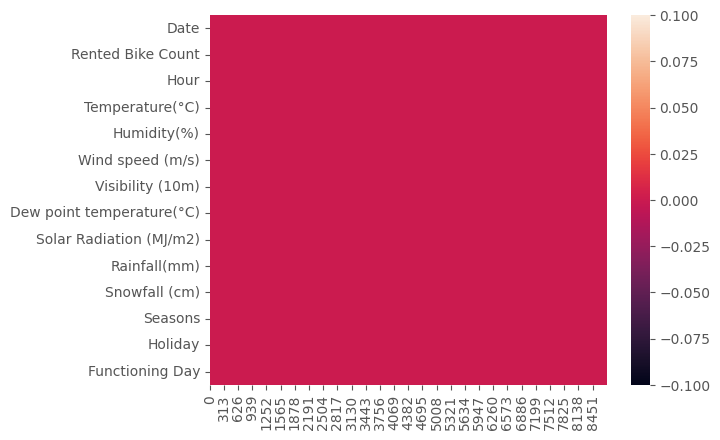

In [ ]:
# Visualizing the missing values
sns.heatmap(seoul_df.isna().transpose())
plt.show()

### What did you know about your dataset?

1. There are 8760 rows and 14 columns.  
2. From the dataset there seems to be 4 categorical variables and 10 numerical variables.  
3. No duplicates found.  
4. No null values found.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
seoul_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe

# numerical variables
seoul_df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [ ]:
# categorical variables

seoul_df.describe(include=['category','object'])

Date Seasons     Holiday Functioning Day
count         8760    8760        8760            8760
unique         365       4           2               2
top     01/12/2017  Spring  No Holiday             Yes
freq            24    2208        8328            8465

### Variables Description


*   **Date**: Date of the day.
*   **Rented Bike Count**: number of bikes that were rented.
*   **Hour**: Hour of the day.
*   **Temperature(°C)**: Temperature of the city at that hour in degree Celsius.
*   **Humidity(%)**: Humidity of the city in that hour in %.
*   **Wind speed (m/s)**: Wind speed during that hour in m/s.
*   **Visibility (10m)**: Visibility is the visibility measure.
*   **Dew point temperature(°C)**: Dew point temperature in that hour in °C.
*   **Solar Radiation (MJ/m2)**: Solar radidation in MJ / m^2.
*   **Rainfall(mm)**: Rainfall in millimeter.
*   **Snowfall (cm)**: Snowfall in centimeter.
*   **Seasons**: The current season.
*   **Holiday**: If the given day is a holiday.
*   **Functioning Day**: If the given day is a Functioning Day.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
seoul_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:

# creating a copy of original
df=seoul_df.copy()

In [ ]:
# Write your code to make your dataset analysis ready.

# converting Date column into date object

seoul_df['Date']=pd.to_datetime(seoul_df['Date'],format='%d/%m/%Y')

# extracting day, month, year from date object
seoul_df['day_of_week']=seoul_df['Date'].dt.day_name()
seoul_df['month_of_day']=seoul_df['Date'].dt.month_name()
seoul_df['Year']=seoul_df['Date'].dt.year

In [ ]:
seoul_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day day_of_week month_of_day  Year  
0             Yes      Friday     December  2017  
1             Yes      Friday     December  2017  
2             Yes      Friday     December  2017  
3             Yes      Friday     December  2017  
4             Yes      Friday     December  2017

In [ ]:
# dropping date column
seoul_df.drop(['Date'],axis=1,inplace=True)

In [ ]:
# changing 'Hour' into object
seoul_df['Hour']=seoul_df['Hour'].astype('object')
seoul_df['Year']=seoul_df['Year'].astype('object')

In [ ]:
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   object 
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  day_of_week                8760 non-null   objec

### What all manipulations have you done and insights you found?

1. We have converted date column into date type  
2. We extracted day, month and year from the date column and dropped the date column  
3. We have converted hour column into object type.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

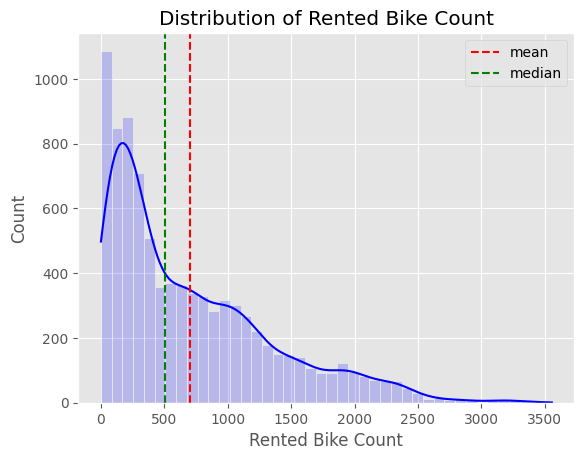

In [ ]:
# Chart - 1 visualization code

# Rented Bike Count
sns.histplot(seoul_df['Rented Bike Count'],kde=True,color='blue',alpha=0.2)
plt.axvline(seoul_df['Rented Bike Count'].mean(),color='red',linestyle='--',label='mean')
plt.axvline(seoul_df['Rented Bike Count'].median(),color='green',linestyle='--',label='median')
plt.legend()
plt.title("Distribution of Rented Bike Count")
plt.show()


##### 1. Why did you pick the specific chart?

1. Rented Bike Count is our target variable, it is important to know the distribution of our target variable in order to fit best machine learning model.

2. This chart will also help to choose how many rental bikes to be supplied.


##### 2. What is/are the insight(s) found from the chart?

The data is right skewed,i.e, mean is greater than median.  
The distribution is also sharp.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since the distribution is sharp, it gives company a good idea and easier to choose about how many how many numbers of rental bikes should be supplied. Hence this information leads to positive buisness growth.

#### Chart - 2

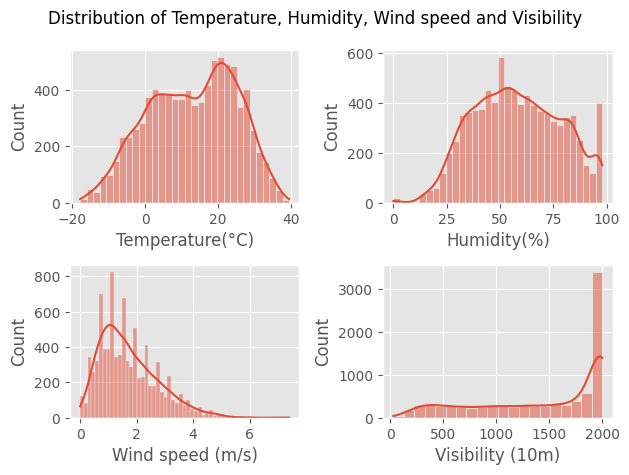

In [ ]:
# Chart - 2 visualization code
# Distribution of Temperature, Humidity, Wind speed and Visibility
features=['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)']
fig,axes=plt.subplots(2,2)
ax=axes[0][0]
sns.histplot(seoul_df[features[0]],kde=True,ax=ax)
ax=axes[0][1]
sns.histplot(seoul_df[features[1]],kde=True,ax=ax)
ax=axes[1][0]
sns.histplot(seoul_df[features[2]],kde=True,ax=ax)
ax=axes[1][1]
sns.histplot(seoul_df[features[3]],kde=True,ax=ax)
fig.suptitle("Distribution of Temperature, Humidity, Wind speed and Visibility")
fig.tight_layout()


##### 1. Why did you pick the specific chart?

It is good to know the distribution of these features, as it gives a good idea of type of transformation we would like to do on them

##### 2. What is/are the insight(s) found from the chart?

the features Temperature, humidity and wind speed take a normal distribution while Visibility takes highly left skewed distribution

#### Chart - 3

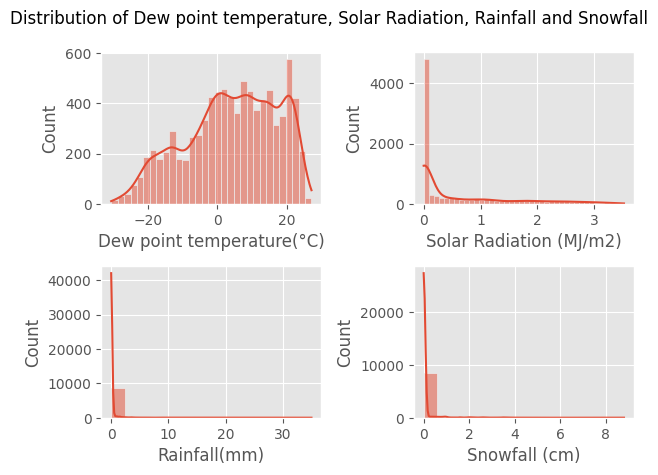

In [ ]:
# Chart - 3 visualization code
# "Distribution of Dew point temperature, Solar Radiation, Rainfall and Snowfall"

features=['Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
fig,axes=plt.subplots(2,2)
ax=axes[0][0]
sns.histplot(seoul_df[features[0]],kde=True,ax=ax)
ax=axes[0][1]
sns.histplot(seoul_df[features[1]],kde=True,ax=ax)
ax=axes[1][0]
sns.histplot(seoul_df[features[2]],kde=True,ax=ax)
ax=axes[1][1]
sns.histplot(seoul_df[features[3]],kde=True,ax=ax)
fig.suptitle("Distribution of Dew point temperature, Solar Radiation, Rainfall and Snowfall")
fig.tight_layout()

##### 1. Why did you pick the specific chart?

It is good to know the distribution of these features, as it gives a good idea of type of transformation we would like to do on them.

##### 2. What is/are the insight(s) found from the chart?

The Dew point temperature takes nearly a normal distribution, while other columns take highly skewed values.

#### Chart - 4

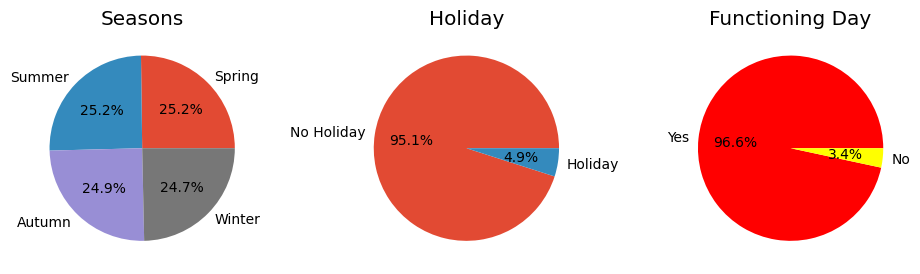

In [ ]:
# Chart - 4 visualization code
fig, axes=plt.subplots(1,3,figsize=(8,5))

# seasons
ax=axes[0]
ax.pie(seoul_df['Seasons'].value_counts(),labels=list(seoul_df['Seasons'].value_counts().index),autopct='%.1f%%')
ax.set_title("Seasons")

# Holiday
ax=axes[1]
ax.pie(seoul_df['Holiday'].value_counts(),labels=list(seoul_df['Holiday'].value_counts().index),autopct='%.1f%%')
ax.set_title("Holiday")

# Functioning day
ax=axes[2]
ax.pie(seoul_df['Functioning Day'].value_counts(),labels=list(seoul_df['Functioning Day'].value_counts().index),autopct='%.1f%%',colors=['red','yellow'])
ax.set_title("Functioning Day")
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.2,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)




##### 1. Why did you pick the specific chart?

We wanted to see how are seasons, holiday and functioning day are distributed in the data

##### 2. What is/are the insight(s) found from the chart?

1. All the four seasons are equally distributed.  

2. 95 percent of the days in year are working days.  

3. Around 97 percent of days in year 2017-2018 in seoul city are functioning days.

#### Chart - 5

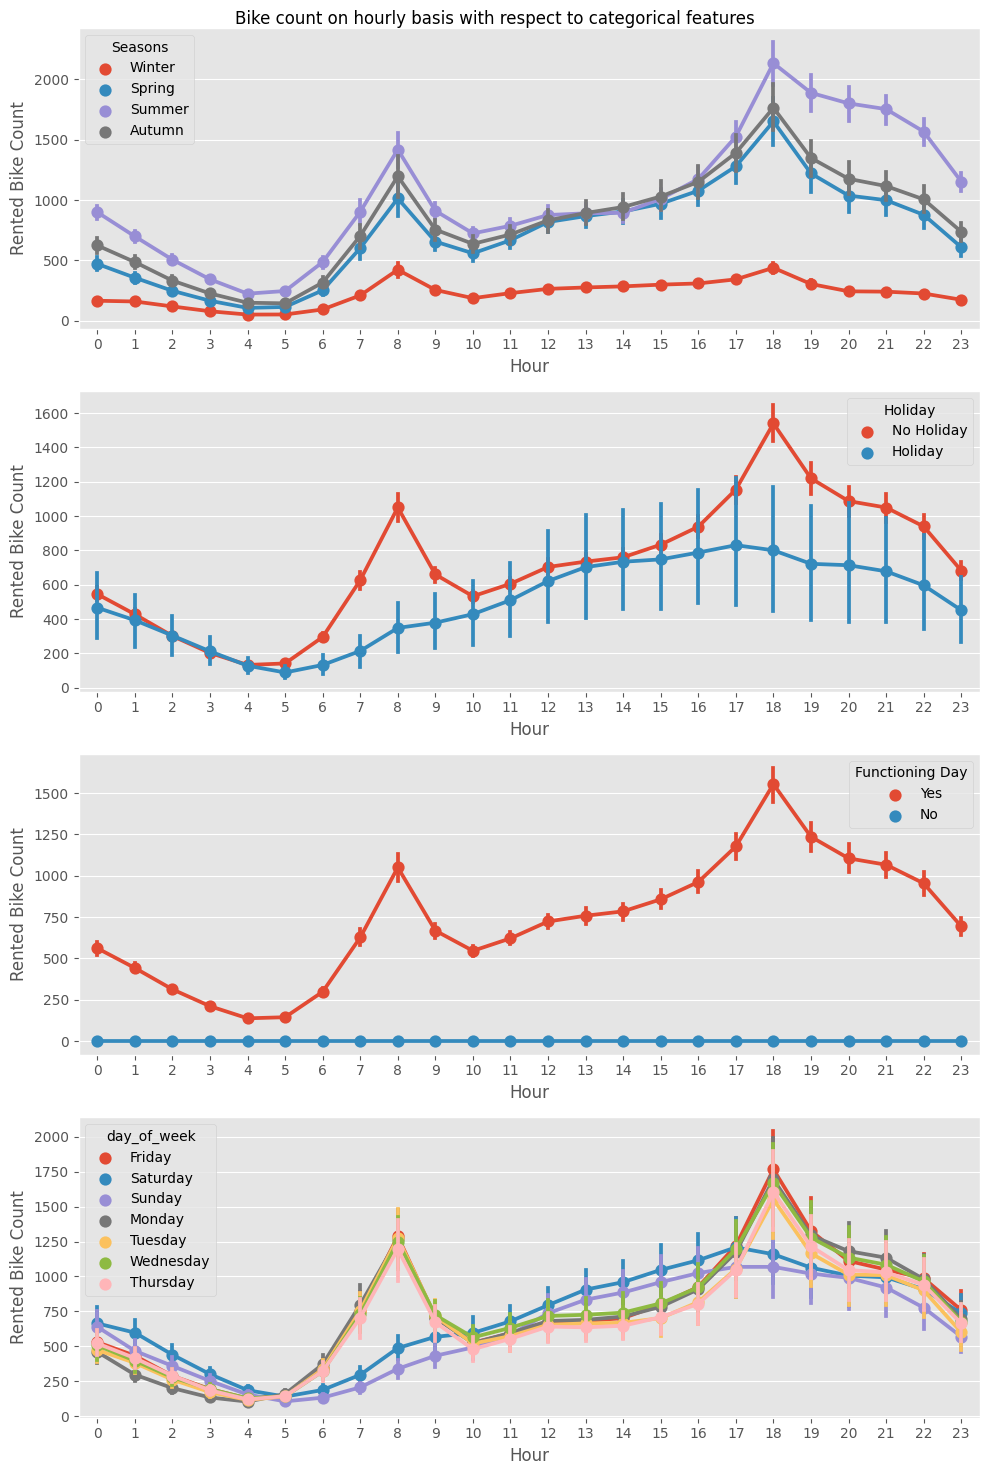

In [ ]:
# Chart - 5 visualization code
# Bike count on hourly basis with respect to various features

fig,ax=plt.subplots(4,1,figsize=(10,15))
hue_list=['Seasons','Holiday','Functioning Day','day_of_week']
for i,j in enumerate(hue_list):
  plt.subplot(4,1,i+1)
  sns.pointplot(x=seoul_df['Hour'],y=seoul_df['Rented Bike Count'],hue=seoul_df[j],ax=plt.gca())
fig.suptitle("Bike count on hourly basis with respect to categorical features")
fig.tight_layout()
plt.show()

In [ ]:
# converting days into week and weekends
seoul_df['day_of_week']=seoul_df['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday','Sunday'] else 'Weekday')

In [ ]:
seoul_df['day_of_week'].value_counts()

Weekday    6264
Weekend    2496
Name: day_of_week, dtype: int64

##### 1. Why did you pick the specific chart?

We wanted to see how the bike count varies in hourly basis based on various features such as seasons, day of the week, functioning day and holiday

##### 2. What is/are the insight(s) found from the chart?

1. Bike count is very high on summer and very low in winter  

2. Bike count is high around 8:00 AM and  6:30 PM, which suggest that these are the busisest hours of the day.  

3. Bike count is high on working day and low on holiday.  

4. From Monday- Friday the distribution is nearly same and for saturday and sunday the distribution is same, which suggest that we have one kind of distribution on weekday and another kind of distribution on weekend.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. From the insights we know that the buisisest hours are 8:00 AM and 6:30 PM, we can increase the bike count during these hours.  

2. We can increase the bike count on working days and weekdays and decrease the bikes for holidays and weekends.

#### Chart - 6

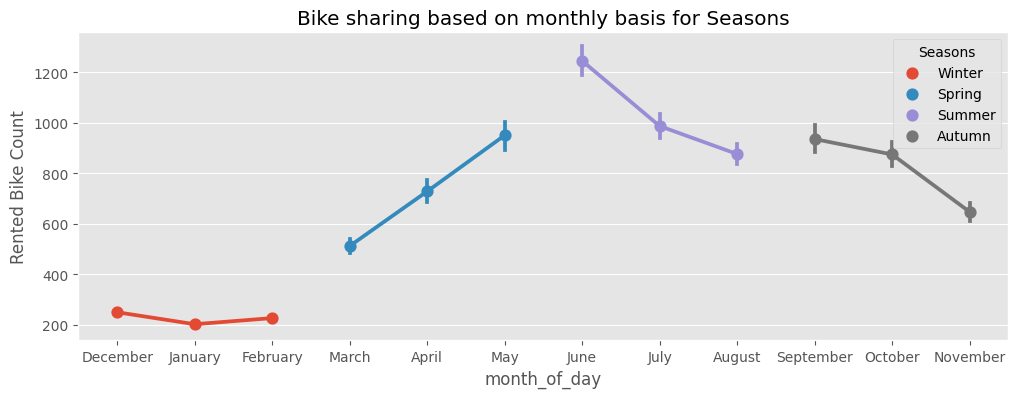

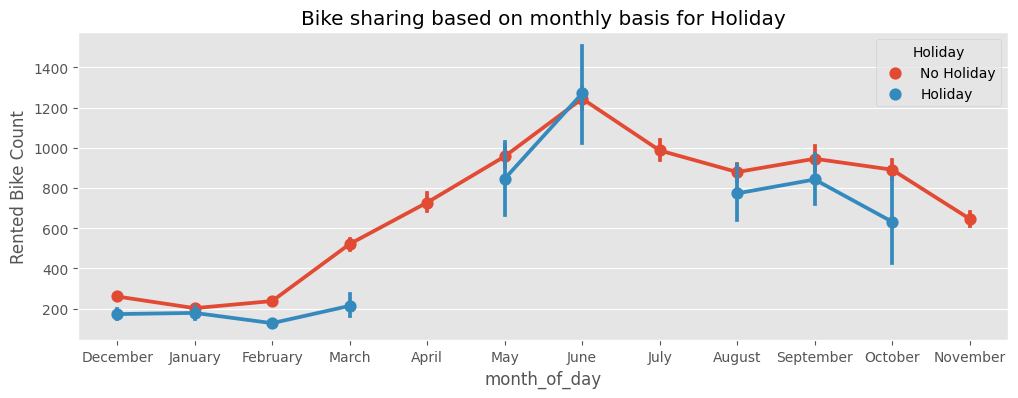

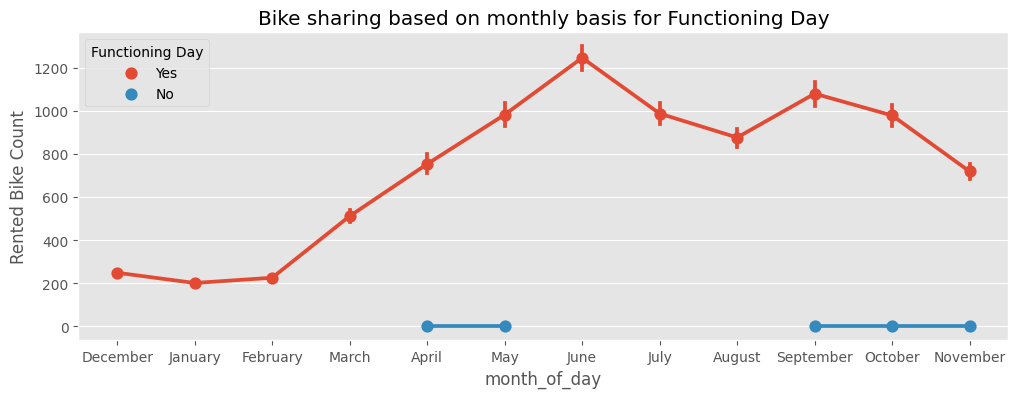

In [ ]:
# Chart - 6 visualization code
# Bike sharing based on monthly basis.

hue_list=['Seasons','Holiday','Functioning Day']
for i in hue_list:
  plt.figure(figsize=(12,4))
  sns.pointplot(x=seoul_df['month_of_day'],y=seoul_df['Rented Bike Count'],hue=seoul_df[i])
  plt.title(f"Bike sharing based on monthly basis for {i}")


##### 1. Why did you pick the specific chart?

We wanted to see the performance of bike sharing on monthly basis.

##### 2. What is/are the insight(s) found from the chart?

1. In month of may, june and july we get maximum bike sharing. It is because these months come under summer season.

2. We have no holiday in april and july month.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

One can increase the bike counts in may, june and july, and decrease the counts in december january and febuary as they are winter seasons.

#### Chart - 7

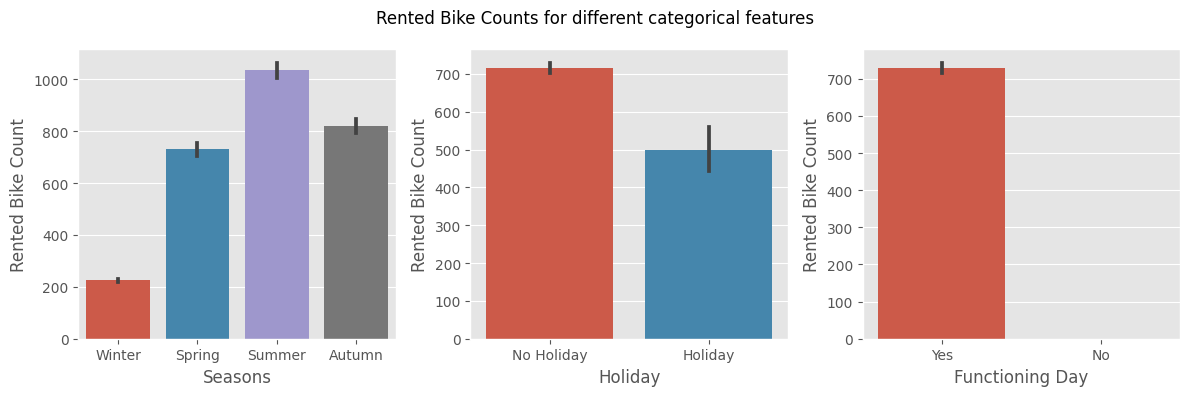

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(12,4)).suptitle("Rented Bike Counts for different categorical features")
plt.subplot(1,3,1)
sns.barplot(x=seoul_df['Seasons'],y=seoul_df['Rented Bike Count'])
plt.subplot(1,3,2)
sns.barplot(x=seoul_df['Holiday'],y=seoul_df['Rented Bike Count'])
plt.subplot(1,3,3)
sns.barplot(x=seoul_df['Functioning Day'],y=seoul_df['Rented Bike Count'])
plt.tight_layout()


##### 1. Why did you pick the specific chart?

We wanted to see by how much bike count varies across different seasons, holidays and functioning day.

##### 2. What is/are the insight(s) found from the chart?

1. Summer season has highest number of bike counts, winter has lowest  

2. Spring and Autumn season have nearly same bike counts  

3. For working day bike count is high which is understable, but even in holidays there is considerable amount of bike counts.

#### Chart - 8

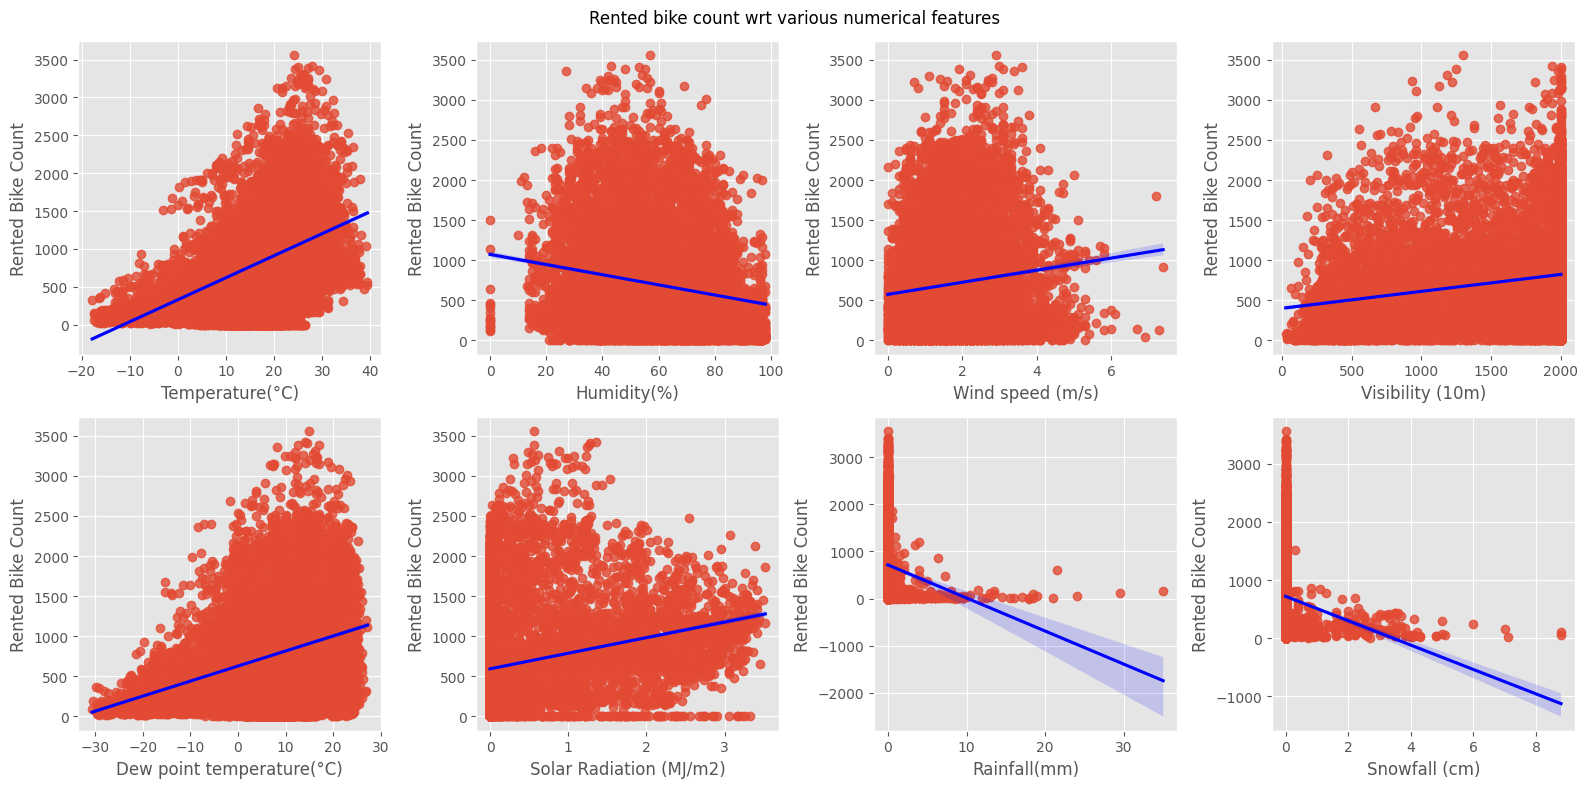

In [ ]:
# Chart - 8 visualization code
fig,ax=plt.subplots(2,4,figsize=(16,8))
num_features = list(seoul_df.describe().columns)
i=0
for features in num_features:
  plt.subplot(2,4,i+1)
  if features!='Rented Bike Count':
    sns.regplot(x=seoul_df[features] , y=seoul_df['Rented Bike Count'],line_kws={"color": "b"})
    i=i+1
fig.suptitle("Rented bike count wrt various numerical features")
plt.tight_layout()

##### 1. Why did you pick the specific chart?

We wanted to see the variation of Rented bike count for various numerical features.

##### 2. What is/are the insight(s) found from the chart?

Some insights found from this chart are:  
1. As the temperature and dew point temperature is increased rented bike count also increased.  
2. As the Solar Radiation increases the rented bike count also increases.  
3. As the rainfall and snowfall increases the rented bike count decreases, which is understable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We get a useful information that at temperature of 30-35, people prefer to ride bikes, this insight can lead to a positive buisness growth.

#### Chart - 9

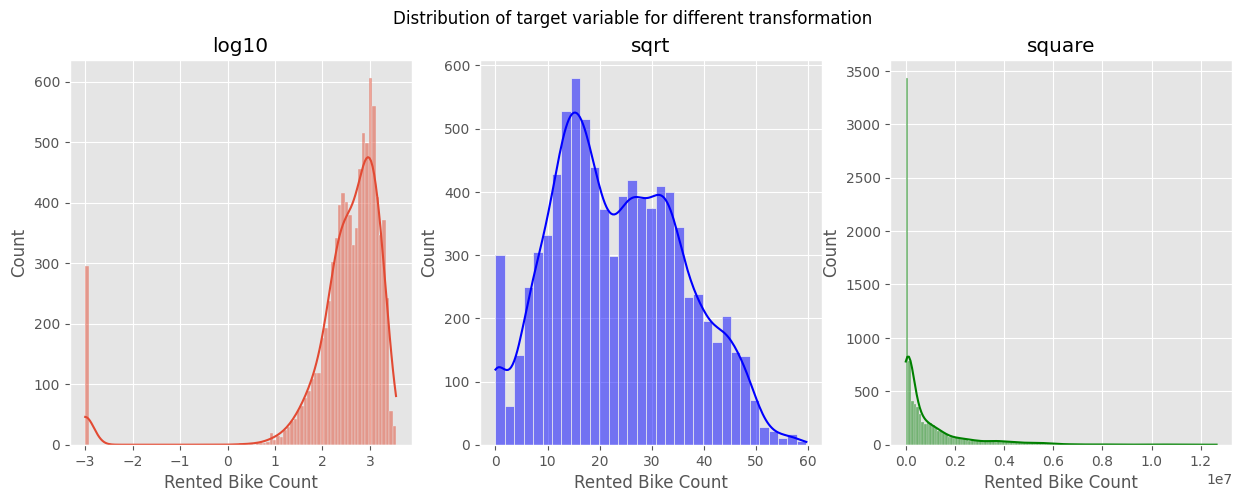

In [ ]:
# Chart - 9 visualization code
# Visualization of target variable for different transformation

fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(np.log10(seoul_df['Rented Bike Count']+0.001),kde=True,ax=ax[0])
ax[0].set_title('log10')
sns.histplot(np.sqrt(seoul_df['Rented Bike Count']),kde=True,ax=ax[1],color='blue')
ax[1].set_title('sqrt')
sns.histplot(np.square(seoul_df['Rented Bike Count']),kde=True,ax=ax[2],color='green')
ax[2].set_title('square')
fig.suptitle("Distribution of target variable for different transformation")
plt.show()

##### 1. Why did you pick the specific chart?

Our target variable was right skewed, So in order to make it normal distribution, we do some transform to it.

##### 2. What is/are the insight(s) found from the chart?

We did log10, square root and square transformation and we found that square root transformation somewhat resembles to normal distribution, so we will use it for our ML prediction.

#### Chart - 10

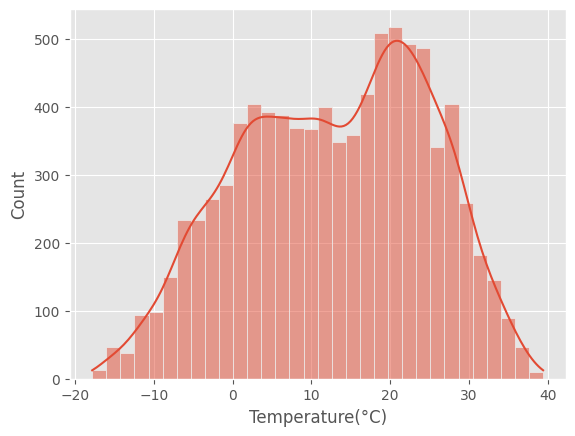

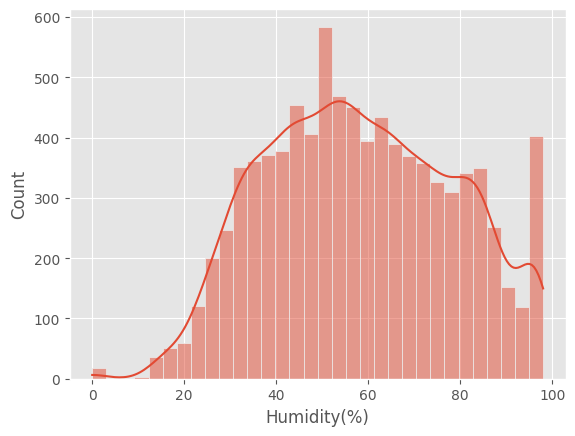

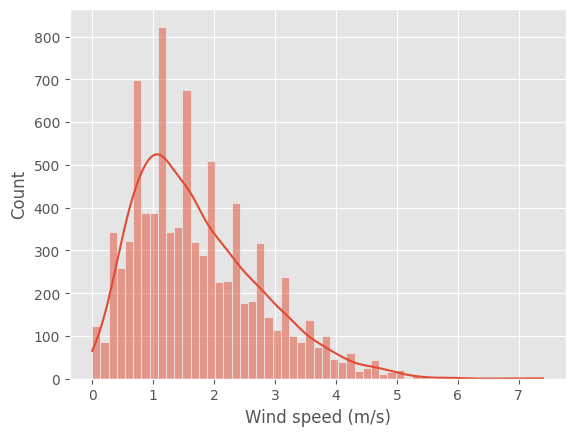

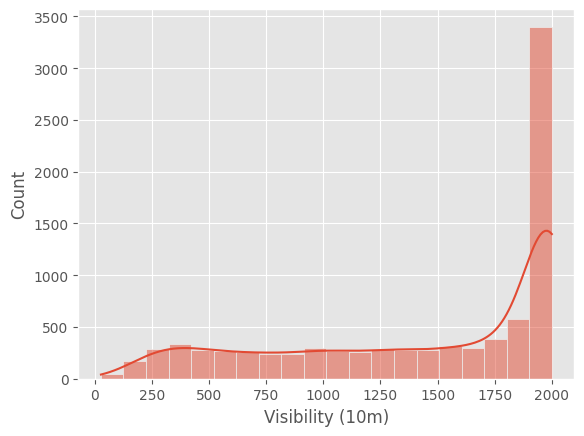

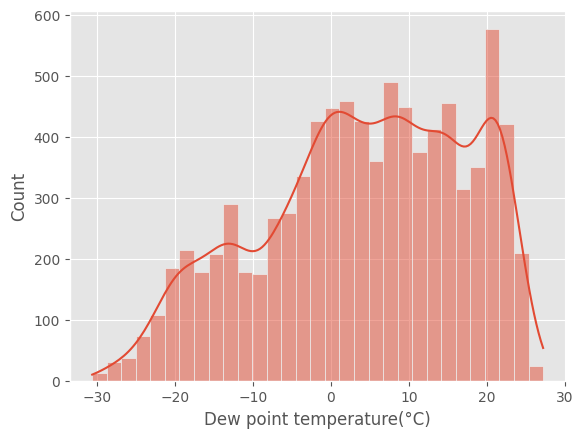

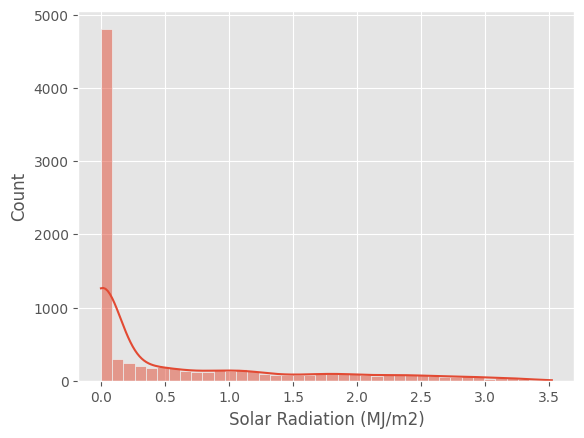

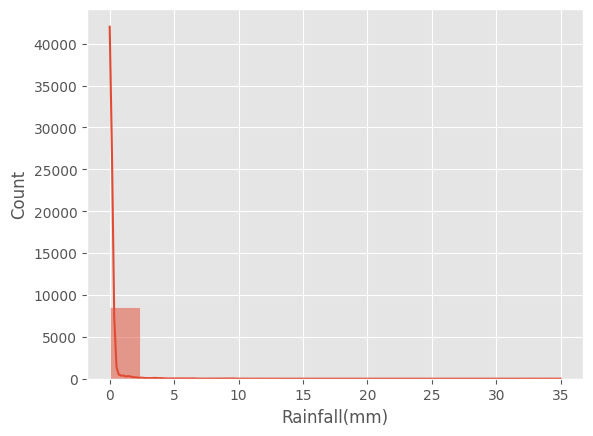

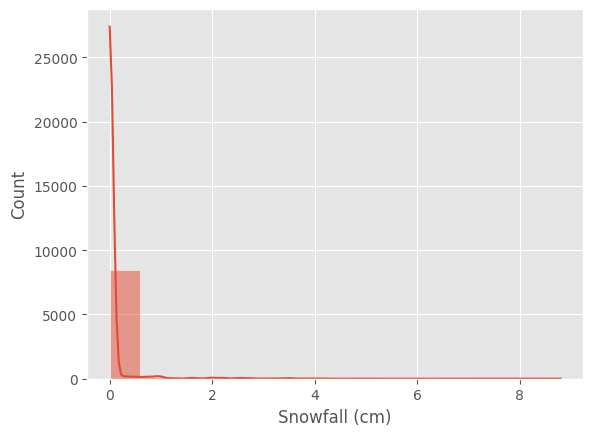

In [ ]:
# Chart - 10 visualization code

# Distribution of numerical columns after standardizing

from scipy.stats import zscore
df_1=seoul_df.copy()
df_1[num_features].apply(zscore)
for features in num_features:
  if features!='Rented Bike Count':
    plt.figure()
    sns.histplot(df_1[features],kde=True)



##### 1. Why did you pick the specific chart?

We wanted to see which of the numerical features follow normal distribution after standardizing. This will help us to understand the distribution of our numerical data and give us an idea to apply appropriate transformation to our numerical independent features.

##### 2. What is/are the insight(s) found from the chart?

Numeric features such as Temperature, Humidity, Windspeed, Dew point temperature follow a kind of normal distribution, while other numeric features don't follow.

#### Chart - 11

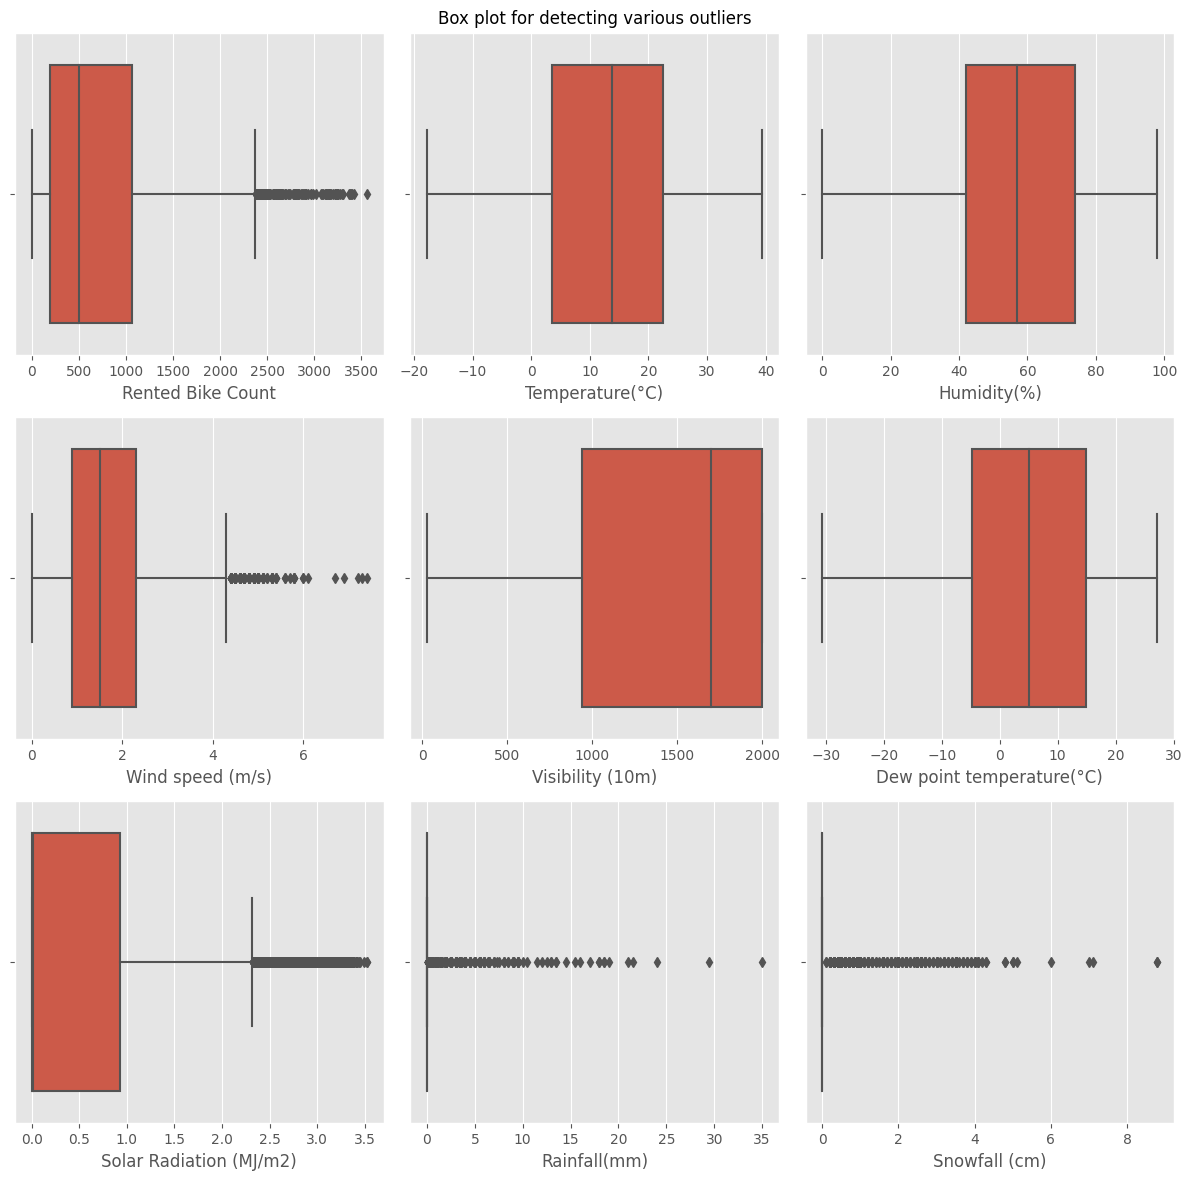

In [ ]:
# Chart - 12 visualization code

# looking for some outliers
plt.figure(figsize=(12,12)).suptitle("Box plot for detecting various outliers")
for i,features in enumerate(num_features):
  plt.subplot(3,3,i+1)
  sns.boxplot(x=seoul_df[features])
plt.tight_layout()

##### 1. Why did you pick the specific chart?

We wanted to look into some outliers for our numerical features, as many of our ML model which we will implement are prone to outliers.

##### 2. What is/are the insight(s) found from the chart?

We see that there are some outliers in rented bike count and wind speed, there are lot of outliers in solar radiation rainfall and snowfall.

#### Chart - 12 - Correlation Heatmap

<Axes: >

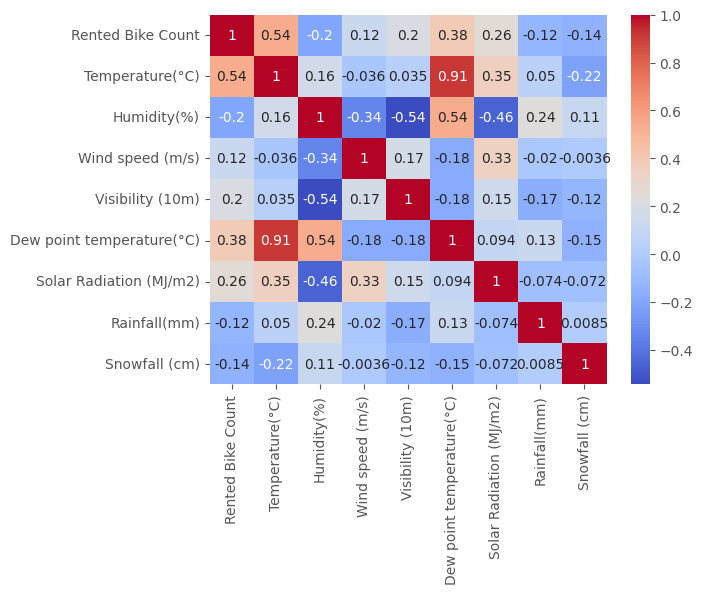

In [ ]:
# Correlation Heatmap visualization code

sns.heatmap(seoul_df.corr(),cmap='coolwarm',annot=True)

##### 1. Why did you pick the specific chart?

We wanted to see the correlation between various numerical features, this is to ensure that there is no correlation between the independent features.

##### 2. What is/are the insight(s) found from the chart?

We see that temperature and dew point temperature are highly correlated, with correlation value of 0.91.

#### Chart - 13 - Pair Plot

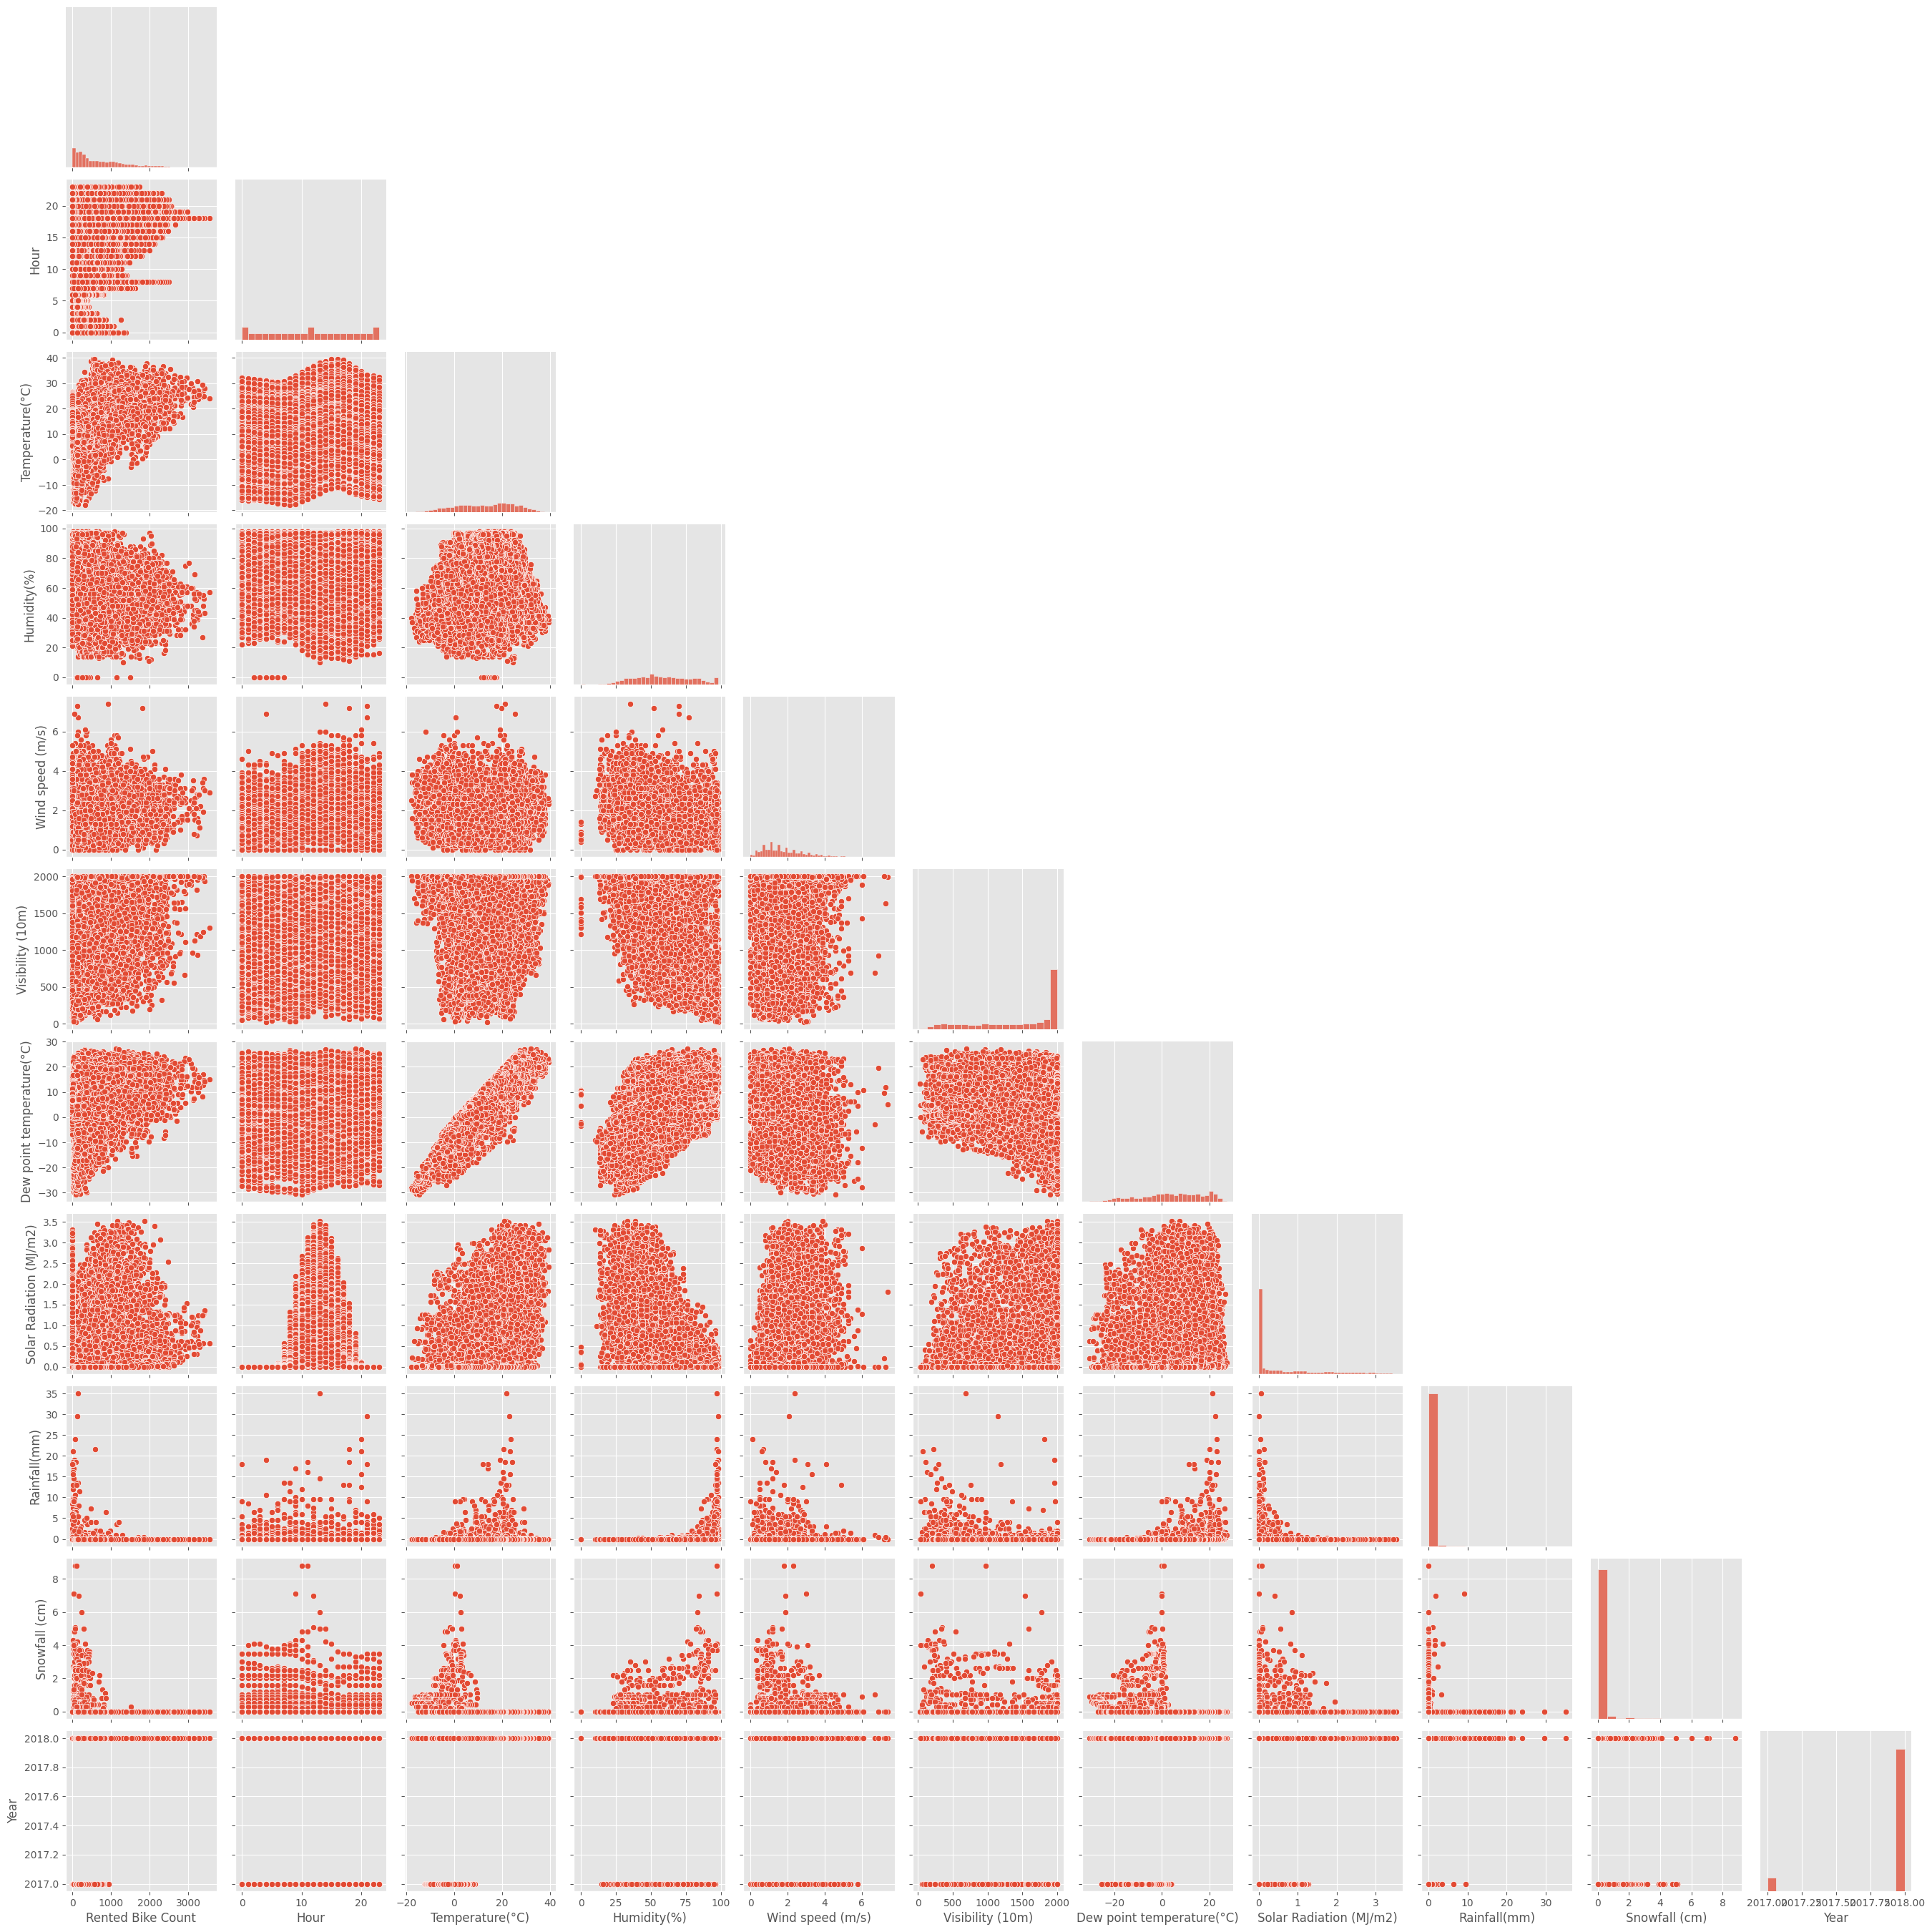

In [ ]:
# Pair Plot visualization code
sns.pairplot(seoul_df,corner=True)

##### 1. Why did you pick the specific chart?

We picked this chart understand the dpendence of a numerical feature with respect to many other numerical features.

##### 2. What is/are the insight(s) found from the chart?

We see that most of the numerical features are independ with respect to each other, except for temperature and dew point temperature, for which we find a strong positive correlation.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Average rented Bike count is greater than 300  
2. Average temperature seoul city is less than 20  
3. Average humidity on seoul city is 58%

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis H0: Average rented bike count = 300  
Alternative hypothesis H1: Average rented bike count > 300   

In this test i am considering significance level of 0.05.


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

bike_cnt_mean=np.mean(seoul_df['Rented Bike Count'])
bike_cnt_std=np.std(seoul_df['Rented Bike Count'],ddof=1)
t_stat=(bike_cnt_mean-300)/(bike_cnt_std/np.sqrt(seoul_df.shape[0]))
p_value=1-t.cdf(t_stat,df=seoul_df.shape[0]-1)
print(p_value)


0.0


##### Which statistical test have you done to obtain P-Value?

I have done right tailed t test to obtain P-value, and found that P-value is close to 0, so we reject the null hypothesis, so average rented bike count is greater than 300.

##### Why did you choose the specific statistical test?

Since we are calculating mean and the population standard deviation is unknown to us so we use t test.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis H0: Average temperature = 15  
Alternative hypothesis H1: Average temperature < 15  
In this test i am considering significance level of 0.05.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

temp_mean=np.mean(seoul_df['Temperature(°C)'])
temp_std=np.std(seoul_df['Temperature(°C)'],ddof=1)
size= len(seoul_df['Temperature(°C)'])

# performing left tailed test
t_stat=(temp_mean-15)/(temp_std/np.sqrt(size))
p_value=t.cdf(t_stat,df=size-1)
print(p_value)

3.55586633479107e-61


##### Which statistical test have you done to obtain P-Value?

I have done left tailed t test, the p_value obtained is very small than our significance value of 0.05, so we reject null hypothesis, so average temperature in seoul city is less than 15°C.

##### Why did you choose the specific statistical test?

Since we are trying to determine the mean temperature of seoul city we don't have population standard deviation so we use t test to validate our hypothesis.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis H0: Average humidity = 58%  
Alternative hypothesis H1: Average temperature != 58%  
In this test i am considering significance level of 0.05.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

humidity_mean=np.mean(seoul_df['Humidity(%)'])
humidity_std=np.std(seoul_df['Humidity(%)'],ddof=1)
size= len(seoul_df['Humidity(%)'])

# performing both tailed test
t_stat=(humidity_mean-58)/(humidity_std/np.sqrt(size))
if t_stat<=0:
  p_value=2*t.cdf(t_stat,df=size-1)
  print(p_value)
else:
  p_value=(1-t.cdf(t_stat,df=size-1))*2
  print(p_value)


0.2983808337533371


##### Which statistical test have you done to obtain P-Value?

I have done both right and left tailed t test to obtain p-value and the p-value i obtained is close to 0.3 which is higher than our significance value so we fail to reject null hypothesis, so the mean humidity of seoul city is around 58%.

##### Why did you choose the specific statistical test?

Since we are trying to determine the mean humidity of seoul city we don't have population standard deviation so we use t test to validate our hypothesis.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### What all missing value imputation techniques have you used and why did you use those techniques?

From earlier discussion there are no missing values found.

### 2. Handling Outliers

In [ ]:
seoul_df1=seoul_df.copy() # creating a copy

In [ ]:
# Handling Outliers & Outlier treatments

# removing outliers for windspeed
Q1=seoul_df1['Wind speed (m/s)'].quantile(0.25)
Q3=seoul_df1['Wind speed (m/s)'].quantile(0.75)
IQR = Q3-Q1
seoul_df1=seoul_df1[~((seoul_df1['Wind speed (m/s)']>(Q3+1.5*IQR))|(seoul_df1['Wind speed (m/s)']<(Q1-1.5*IQR)))]



<Axes: >

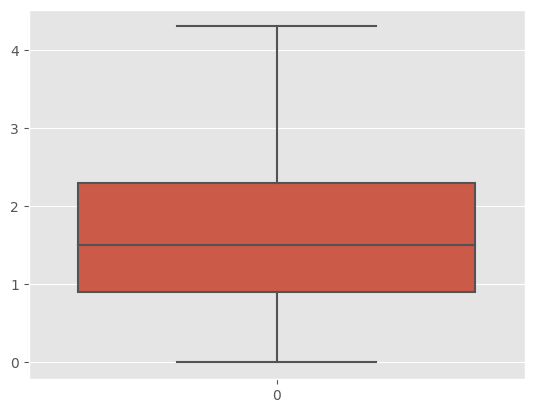

In [ ]:
sns.boxplot(seoul_df1['Wind speed (m/s)'])

##### What all outlier treatment techniques have you used and why did you use those techniques?

Here we have removed the the outliers for wind speed column, we have used IQR based technique to remove the outliers.

### 4. Feature Manipulation & Selection

#### 1. Feature Selection

<Axes: >

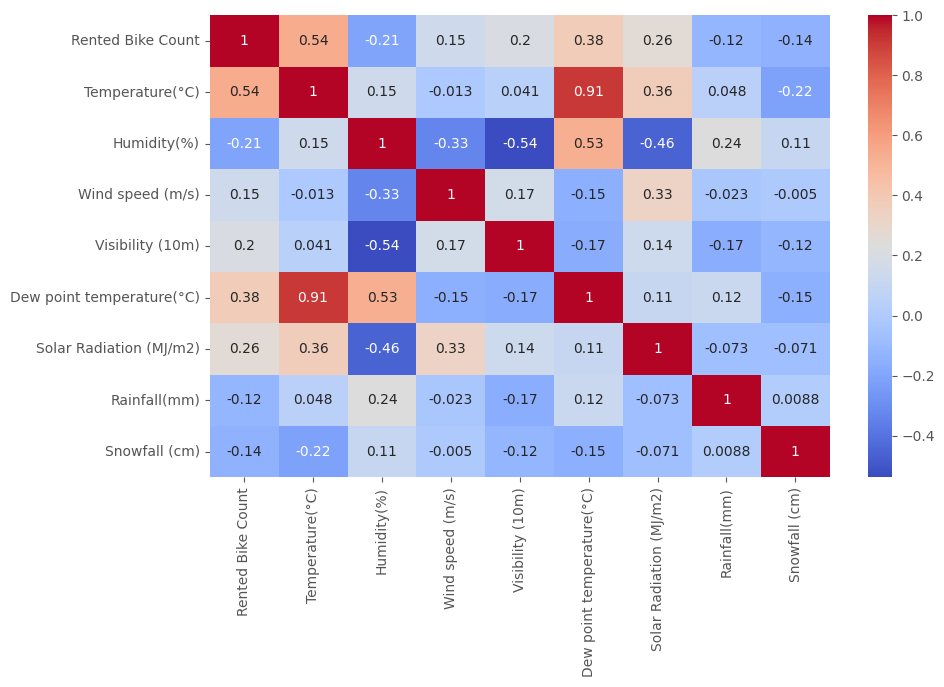

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
plt.figure(figsize=(10,6))
sns.heatmap(seoul_df1.corr(),cmap='coolwarm',annot=True)

We see that Temperature and Dew point temperature are highly correlated variables.We need to run VIF method to further check on multicollinearity.

In [ ]:
# VIF checking

# creating a function for calculating vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  vif=pd.DataFrame()
  vif['variables']=X.columns
  vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
  return vif


In [ ]:
cols=[col for col in seoul_df1.describe().columns if col not in ['Rented Bike Count']]
X=seoul_df1[cols]
calc_vif(X)

variables        VIF
0            Temperature(°C)  29.558941
1                Humidity(%)   5.164831
2           Wind speed (m/s)   4.843949
3           Visibility (10m)   8.952839
4  Dew point temperature(°C)  15.304549
5    Solar Radiation (MJ/m2)   2.783182
6               Rainfall(mm)   1.078632
7              Snowfall (cm)   1.117790

In [ ]:
cols

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

We See that Temperature and Dew point temperature have high VIF values, let us remove Dew point temperature.

In [ ]:
calc_vif(seoul_df1[[col for col in seoul_df1.describe().columns if col not in ['Rented Bike Count','Dew point temperature(°C)']]])

variables       VIF
0          Temperature(°C)  3.188142
1              Humidity(%)  4.824023
2         Wind speed (m/s)  4.330114
3         Visibility (10m)  4.432786
4  Solar Radiation (MJ/m2)  2.222851
5             Rainfall(mm)  1.077214
6            Snowfall (cm)  1.117785

In [ ]:
# Select your features wisely to avoid overfitting

# important numerical features
num_features=[col for col in seoul_df1.describe().columns if col not in ['Dew point temperature(°C)']]
print("Important numerical features : ",num_features)
# important categorical features
cat_features=list(seoul_df.describe(include='object').columns)
print("Important categorical features : ",cat_features)

Important numerical features :  ['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
Important categorical features :  ['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'day_of_week', 'month_of_day', 'Year']


##### What all feature selection methods have you used  and why?

We have calculated the VIF for each feature, if the vif is found to be very high we remove that feature. We have done this feature selection method to remove multicollinear variables.

##### Which all features you found important and why?

The features that we found important are Temperature, humidity, windspeed visibility, solar radiation rainfall and snowfall. These variables have VIF less than 5, so we keep these variables.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

# use one hot encoding to all categorical columns
df=pd.get_dummies(seoul_df1,columns=cat_features,drop_first=True)
df.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning Day_Yes',
       'day_of_week_Weekend', 'month_of_day_August', 'month_of_day_December',
       'month_of_day_February', 'month_of_day_January', 'month_of_day_July',
       'month_of_day_June', 'month_of_day_March', 'month_of_day_May',
       'month_of_day_November', 'month_of_day_October',
       'month_of_day_September', 'Year_2018'],
      dtype='object')

In [ ]:
df.head()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  Hour_1  ...  month_of_day_February  \
0           0.0            0.0       0  ...                      0   
1           0.0            0.0       1  ...                      0   
2           0.0            0.0       0  ...                      0   
3           0.0            0.0       0  ...                      0   
4           0.0            0.0       0  ...                      0   

   month_of_day_January  month_of_day_July  month_of_day_June  \
0                     0                  0                  0   
1                     0                  0                  0   
2                     0                  0                  0   
3                     0                  0                  0   
4                     0                  0                  0   

   month_of_day_March  month_of_day_May  month_of_day_November  \
0                   0                 0                      0   
1                   0                 0                      0   
2                   0                 0                      0   
3                   0                 0                      0   
4                   0                 0                      0   

   month_of_day_October  month_of_day_September  Year_2018  
0                     0                       0          0  
1                     0                       0          0  
2                     0                       0          0  
3                     0                       0          0  
4                     0                       0          0  

[5 rows x 50 columns]

#### What all categorical encoding techniques have you used & why did you use those techniques?


We have used one hot encoding on categorical variables, because there is no hierarchial order among these categorical features.




### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
y=np.sqrt(df['Rented Bike Count'])

We have done square root transformation to our target variable, as square root transformation leads to a normal distribution of our target variable.

### 6. Data Scaling

In [ ]:
df.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning Day_Yes',
       'day_of_week_Weekend', 'month_of_day_August', 'month_of_day_December',
       'month_of_day_February', 'month_of_day_January', 'month_of_day_July',
       'month_of_day_June', 'month_of_day_March', 'month_of_day_May',
       'month_of_day_November', 'month_of_day_October',
       'month_of_day_September', 'Year_2018'],
      dtype='object')

In [ ]:
X=df.drop(['Rented Bike Count','Dew point temperature(°C)'],axis=1) # dropping unwanted features
X.columns

Index(['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5',
       'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday',
       'Functioning Day_Yes', 'day_of_week_Weekend', 'month_of_day_August',
       'month_of_day_December', 'month_of_day_February',
       'month_of_day_January', 'month_of_day_July', 'month_of_day_June',
       'month_of_day_March', 'month_of_day_May', 'month_of_day_November',
       'month_of_day_October', 'month_of_day_September', 'Year_2018'],
      dtype='object')

In [ ]:
# Scaling your data

# standardising
from sklearn.preprocessing import StandardScaler

# creating dependent and independent variable
X=df.drop(['Rented Bike Count','Dew point temperature(°C)'],axis=1) # dropping unwanted features
scaler=StandardScaler()
X=scaler.fit_transform(X)


In [ ]:
X.shape

(8599, 48)

In [ ]:
seoul_df.shape

(8760, 16)

##### Which method have you used to scale you data and why?

We have used Standard scalar to our independent variables to transform our data, we did this as we wanted our independent features to have normal distribution, so that we implement ML models

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

##### What data splitting ratio have you used and why?

We have done a train test split with 75% train data and 25% test data, we chose this ratio as this gave better results.

## ***7. ML Model Implementation***

### Linear Regression

In [ ]:
# ML Model - 1 Implementation
# Linear regression
l_reg=LinearRegression()

# Fit the Algorithm
l_reg.fit(X_train,y_train)

# Predict on the model
y_pred_tr=l_reg.predict(X_train)
y_pred_tst=l_reg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# calculating different performance metric

# MSE
MSE_tr=mean_squared_error(y_train**2,y_pred_tr**2)
print("MSE of train data is:",MSE_tr)
MSE_tst=mean_squared_error(y_test**2,y_pred_tst**2)
print("MSE of test data is:",MSE_tst)

# MAE
MAE_tr=mean_absolute_error(y_train**2,y_pred_tr**2)
print("MAE of train data is:",MAE_tr)
MAE_tst=mean_absolute_error(y_test**2,y_pred_tst**2)
print("MAE of test data is:",MAE_tst)

# RMSE
rmse_tr=np.sqrt(MSE_tr)
print("RMSE of train data is:",rmse_tr)
rmse_tst=np.sqrt(MSE_tst)
print("RMSE of test data is:",rmse_tst)

# r2 score
r2_tr=r2_score(y_train**2,y_pred_tr**2)
print("r2 score for train is:",r2_tr)
r2_tst=r2_score(y_test**2,y_pred_tst**2)
print("r2 score for test is:",r2_tst)
# adjusted r2 score
adjr2_tr = (1-(1-r2_score(y_train**2, y_pred_tr**2))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("The adjusted r2 score for train data is:",adjr2_tr)
adjr2_tst=(1-(1-r2_score(y_test**2, y_pred_tst**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("The adjusted r2 score for test data is:",adjr2_tst)



MSE of train data is: 101972.27012212273
MSE of test data is: 100053.47691340532
MAE of train data is: 219.0556852577076
MAE of test data is: 215.44243265967643
RMSE of train data is: 319.3309726946679
RMSE of test data is: 316.31230913988367
r2 score for train is: 0.756794744669831
r2 score for test is: 0.7608174299627932
The adjusted r2 score for train data is: 0.7549707052548547
The adjusted r2 score for test data is: 0.7553530018991159


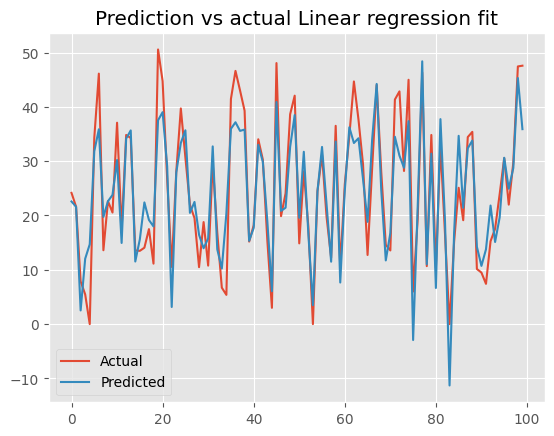

In [ ]:
# Visualizing evaluation Metric Score chart
plt.plot(np.array(y_test)[:100],label="Actual")
plt.plot(y_pred_tst[:100],label="Predicted")
plt.legend()
plt.title("Prediction vs actual Linear regression fit")
plt.show()



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
X_train.shape

(6449, 48)

In [ ]:
# cross validation using linear regression

from sklearn.model_selection import ShuffleSplit
lr=LinearRegression()
lr.fit(X,y)
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
lr_cv=GridSearchCV(estimator=lr,cv=cv,param_grid={})
lr_cv.fit(X_train,y_train)
y_hat=lr_cv.predict(X_train)
print("The r2 score obtained using only cross validation is:",r2_score(y_train**2,y_hat**2))



The r2 score obtained using only cross validation is: 0.756794744669831


##### Which hyperparameter optimization technique have you used and why?

We have only used cross validation as there are no hyperparmeters in linear regression

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is very small improvemnt in r2 score

### Ridge Regression

#### 1. Cross- Validation & Hyperparameter Tuning

In [ ]:
# instantiating a model object
ridge=Ridge()
# setting hyperparameters
param_grid = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}

# instantiating a GridSearchcv object for the model
ridge_grid=GridSearchCV(estimator=ridge,param_grid=param_grid,cv=5)

# fitting the model across various grids
ridge_grid.fit(X_train,y_train)

# finding the optimal model
ridge_optimal=ridge_grid.best_estimator_

# displaying the best parameters for the model
print("The best parameters are:",ridge_grid.best_params_)

# predicting train and test data
y_ridge_tr=ridge_optimal.predict(X_train)
y_ridge_tst=ridge_optimal.predict(X_test)



The best parameters are: {'alpha': 10}


#### 2. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# calculating different performance metric

# MSE
MSE_tr=mean_squared_error(y_train**2,y_ridge_tr**2)
print("MSE of train data is:",MSE_tr)
MSE_tst=mean_squared_error(y_test**2,y_ridge_tst**2)
print("MSE of test data is:",MSE_tst)

# MAE
MAE_tr=mean_absolute_error(y_train**2,y_ridge_tr**2)
print("MAE of train data is:",MAE_tr)
MAE_tst=mean_absolute_error(y_test**2,y_ridge_tst**2)
print("MAE of test data is:",MAE_tst)

# RMSE
rmse_tr=np.sqrt(MSE_tr)
print("RMSE of train data is:",rmse_tr)
rmse_tst=np.sqrt(MSE_tst)
print("RMSE of test data is:",rmse_tst)

# r2 score
r2_tr=r2_score(y_train**2,y_ridge_tr**2)
print("r2 score for train is:",r2_tr)
r2_tst=r2_score(y_test**2,y_ridge_tst**2)
print("r2 score for test is:",r2_tst)

# adjusted r2 score
adjr2_tr = (1-(1-r2_score(y_train**2, y_ridge_tr**2))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("The adjusted r2 score for train data is:",adjr2_tr)
adjr2_tst=(1-(1-r2_score(y_test**2, y_ridge_tst**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("The adjusted r2 score for test data is:",adjr2_tst)



MSE of train data is: 102051.05658298467
MSE of test data is: 100114.46941125755
MAE of train data is: 219.1577870279592
MAE of test data is: 215.53796006343765
RMSE of train data is: 319.45431063453293
RMSE of test data is: 316.40870628232966
r2 score for train is: 0.7566068378858833
r2 score for test is: 0.7606716245111556
The adjusted r2 score for train data is: 0.7547813891700275
The adjusted r2 score for test data is: 0.7552038653376836


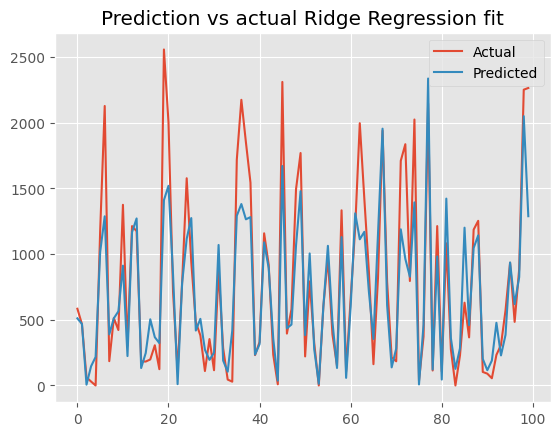

In [ ]:
# Visualizing evaluation Metric Score chart

plt.plot(np.array(y_test**2)[:100],label="Actual")
plt.plot(y_ridge_tst[:100]**2,label="Predicted")
plt.legend()
plt.title("Prediction vs actual Ridge Regression fit")
plt.show()


##### Which hyperparameter optimization technique have you used and why?

We have used Ridge regression, we have used alpha value as our hyperparameters, we passed them in GridSearchCv along with cv=5.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

 From Evaluation metric score we see that there is not much significant improvement from our previous model Linear Regression

### Lasso Regression

#### 1. Cross- Validation & Hyperparameter Tuning

In [ ]:
# instantiating a model object
lasso=Lasso()
# setting hyperparameters
param_grid = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}

# instantiating a GridSearchcv object for the model
lasso_grid=GridSearchCV(estimator=lasso,param_grid=param_grid,scoring='r2',cv=5)

# fitting the model across various grids
lasso_grid.fit(X_train,y_train)

# finding the optimal model
lasso_optimal=lasso_grid.best_estimator_

# displaying the best parameters for the model
print("The best parameters are:",lasso_grid.best_params_)

# predicting train and test data
y_lasso_tr=lasso_optimal.predict(X_train)
y_lasso_tst=lasso_optimal.predict(X_test)

The best parameters are: {'alpha': 0.01}


##### Which hyperparameter optimization technique have you used and why?

We have used Lasso regression, we have used alpha value as our hyperparameters, we passed them in GridSearchCv along with cv=5.

#### 2. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# calculating different perfomence metric

# MSE
MSE_tr=mean_squared_error(y_train**2,y_lasso_tr**2)
print("MSE of train data is:",MSE_tr)
MSE_tst=mean_squared_error(y_test**2,y_lasso_tst**2)
print("MSE of test data is:",MSE_tst)

# MAE
MAE_tr=mean_absolute_error(y_train**2,y_lasso_tr**2)
print("MAE of train data is:",MAE_tr)
MAE_tst=mean_absolute_error(y_test**2,y_lasso_tst**2)
print("MAE of test data is:",MAE_tst)

# RMSE
rmse_tr=np.sqrt(MSE_tr)
print("RMSE of train data is:",rmse_tr)
rmse_tst=np.sqrt(MSE_tst)
print("RMSE of test data is:",rmse_tst)

# r2 score
r2_tr=r2_score(y_train**2,y_lasso_tr**2)
print("r2 score for train is:",r2_tr)
r2_tst=r2_score(y_test**2,y_ridge_tst**2)
print("r2 score for test is:",r2_tst)
# adjusted r2 score
adjr2_tr = (1-(1-r2_score(y_train**2, y_lasso_tr**2))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("The adjusted r2 score for train data is:",adjr2_tr)
adjr2_tst=(1-(1-r2_score(y_test**2, y_lasso_tst**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("The adjusted r2 score for test data is:",adjr2_tst)


MSE of train data is: 102403.41868225027
MSE of test data is: 100509.64320949152
MAE of train data is: 219.3759638685817
MAE of test data is: 215.7796662481169
RMSE of train data is: 320.00534164643295
RMSE of test data is: 317.0325585953145
r2 score for train is: 0.7557664494722692
r2 score for test is: 0.7606716245111556
The adjusted r2 score for train data is: 0.7539346978433112
The adjusted r2 score for test data is: 0.7542376012312424


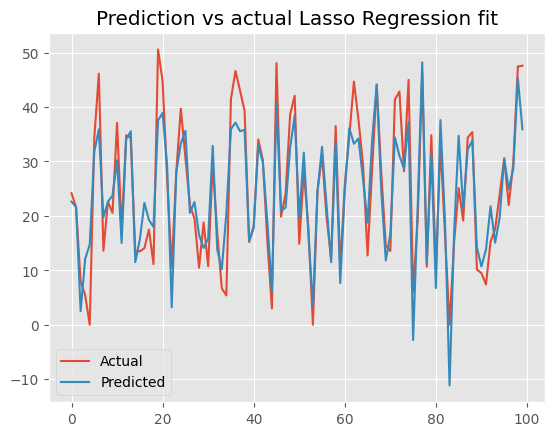

In [ ]:
# Visualizing prediction and actual

plt.plot(np.array(y_test)[:100],label="Actual")
plt.plot(y_lasso_tst[:100],label="Predicted")
plt.legend()
plt.title("Prediction vs actual Lasso Regression fit")
plt.show()

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Not much improvement observed

### Polynomial Regression

In [ ]:
# instantiating polynomial features
poly=PolynomialFeatures(degree=2)

# creating all combinations of features upto degree 2
X_poly_tr=poly.fit_transform(X_train)   #train data
X_poly_tst=poly.fit_transform(X_test)   # test data

# Fit the Algorithm
poly_reg=LinearRegression()
poly_reg.fit(X_poly_tr,y_train)

# Predict on the model
y_poly_tr=poly_reg.predict(X_poly_tr)
y_poly_tst=poly_reg.predict(X_poly_tst)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# calculating different perfomance metric

# MSE
MSE_tr=mean_squared_error(y_train**2,y_poly_tr**2)
print("MSE of train data is:",MSE_tr)
MSE_tst=mean_squared_error(y_test**2,y_poly_tst**2)
print("MSE of test data is:",MSE_tst)

# MAE
MAE_tr=mean_absolute_error(y_train**2,y_poly_tr**2)
print("MAE of train data is:",MAE_tr)
MAE_tst=mean_absolute_error(y_test**2,y_poly_tst**2)
print("MAE of test data is:",MAE_tst)

# RMSE
rmse_tr=np.sqrt(MSE_tr)
print("RMSE of train data is:",rmse_tr)
rmse_tst=np.sqrt(MSE_tst)
print("RMSE of test data is:",rmse_tst)

# r2 score
r2_tr=r2_score(y_train**2,y_poly_tr**2)
print("r2 score for train is:",r2_tr)
r2_tst=r2_score(y_test**2,y_poly_tst**2)
print("r2 score for test is:",r2_tst)
# adjusted r2 score
adjr2_tr = (1-(1-r2_score(y_train**2, y_poly_tr**2))*((X_poly_tr.shape[0]-1)/(X_poly_tr.shape[0]-X_poly_tr.shape[1]-1)))
print("The adjusted r2 score for train data is:",adjr2_tr)
adjr2_tst=(1-(1-r2_score(y_test**2, y_poly_tst**2))*((X_poly_tst.shape[0]-1)/(X_poly_tst.shape[0]-X_poly_tst.shape[1]-1)))
print("The adjusted r2 score for test data is:",adjr2_tst)

MSE of train data is: 31497.561037453983
MSE of test data is: 32585.35022221407
MAE of train data is: 108.25099907782126
MAE of test data is: 115.72659993584419
RMSE of train data is: 177.47552236140618
RMSE of test data is: 180.5141274865047
r2 score for train is: 0.9248778872411347
r2 score for test is: 0.9221031786985566
The adjusted r2 score for train data is: 0.9072587817213932
The adjusted r2 score for test data is: 0.818830877730734


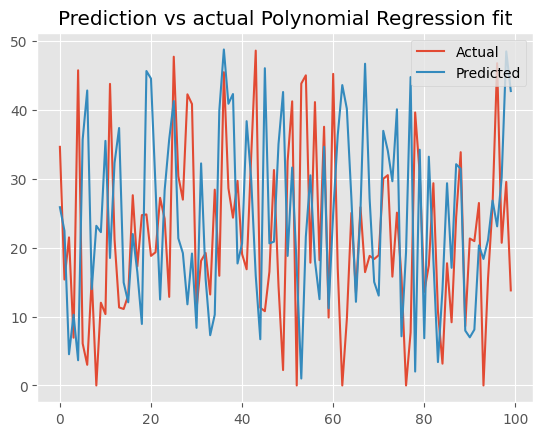

In [ ]:
# visualizing predicted and actual data in polynomial regression

plt.plot(np.array(y_train)[:100],label="Actual")
plt.plot(y_poly_tst[:100],label="Predicted")
plt.legend()
plt.title("Prediction vs actual Polynomial Regression fit")
plt.show()

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is a significant improvement in the performance of the model, MAE error has improved, so has RMSE and there is a improment in r2 score, but there is difference between train adjusted r2 score and test adjusted r2 score, which shows that our model is overfitting

### Decision Trees

#### 1. Cross- Validation & Hyperparameter Tuning

In [ ]:
# instantiating a model object
dt_reg=DecisionTreeRegressor()


# setting hyperparameters
param_grid = {'max_depth':[5,10,15,20,25,30,35,40],
              'min_samples_leaf':[3,5,10,15],
              'min_samples_split':[8,10,12,15,18,20],
              'criterion':['squared_error']}

# instantiating a GridSearchcv object for the model
dt_reg_grid=GridSearchCV(estimator=dt_reg,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error')

# fitting the model across various grids
dt_reg_grid.fit(X_train,y_train)

# finding the optimal model
dt_reg_optimal=dt_reg_grid.best_estimator_

# displaying the best parameters for the model
print("The best parameters are:",dt_reg_grid.best_params_)

# predicting train and test data
y_dt_reg_tr=dt_reg_optimal.predict(X_train)
y_dt_reg_tst=dt_reg_optimal.predict(X_test)

The best parameters are: {'criterion': 'squared_error', 'max_depth': 25, 'min_samples_leaf': 5, 'min_samples_split': 8}


In [ ]:
# calculating different performance metric

# MSE
MSE_tr=mean_squared_error(y_train**2,y_dt_reg_tr**2)
print("MSE of train data is:",MSE_tr)
MSE_tst=mean_squared_error(y_test**2,y_dt_reg_tst**2)
print("MSE of test data is:",MSE_tst)

# MAE
MAE_tr=mean_absolute_error(y_train**2,y_dt_reg_tr**2)
print("MAE of train data is:",MAE_tr)
MAE_tst=mean_absolute_error(y_test**2,y_dt_reg_tst**2)
print("MAE of test data is:",MAE_tst)

# RMSE
rmse_tr=np.sqrt(MSE_tr)
print("RMSE of train data is:",rmse_tr)
rmse_tst=np.sqrt(MSE_tst)
print("RMSE of test data is:",rmse_tst)

# r2 score
r2_tr=r2_score(y_train**2,y_dt_reg_tr**2)
print("r2 score for train is:",r2_tr)
r2_tst=r2_score(y_test**2,y_dt_reg_tst**2)
print("r2 score for test is:",r2_tst)

# adjusted r2 score
adjr2_tr = (1-(1-r2_score(y_train**2, y_dt_reg_tr**2))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("The adjusted r2 score for train data is:",adjr2_tr)
adjr2_tst=(1-(1-r2_score(y_test**2, y_dt_reg_tst**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("The adjusted r2 score for test data is:",adjr2_tst)

MSE of train data is: 25616.16403558738
MSE of test data is: 54054.301634158175
MAE of train data is: 93.24547482208341
MAE of test data is: 141.61297285193004
RMSE of train data is: 160.05050464021468
RMSE of test data is: 232.49580992817522
r2 score for train is: 0.9389050993236353
r2 score for test is: 0.8707806346638604
The adjusted r2 score for train data is: 0.9384468875685625
The adjusted r2 score for test data is: 0.867828454970317


##### Which hyperparameter optimization technique have you used and why?

For hyperparameters we have set some vales for max_depth, min_samples_leaf,min_samples_split and criterion.  

We have passed these parameters in GridSearchCv with cv=5 and scoring set to neg_mean_squared_error.

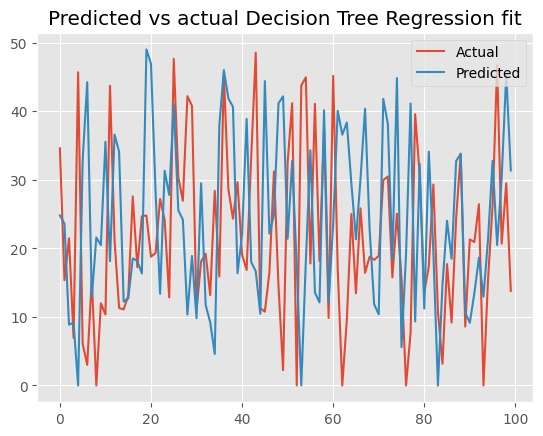

In [ ]:
# visualizing the predicted decision trees

plt.plot(np.array(y_train)[:100],label="Actual")
plt.plot(y_dt_reg_tst[:100],label="Predicted")
plt.legend()
plt.title("Predicted vs actual Decision Tree Regression fit")
plt.show()

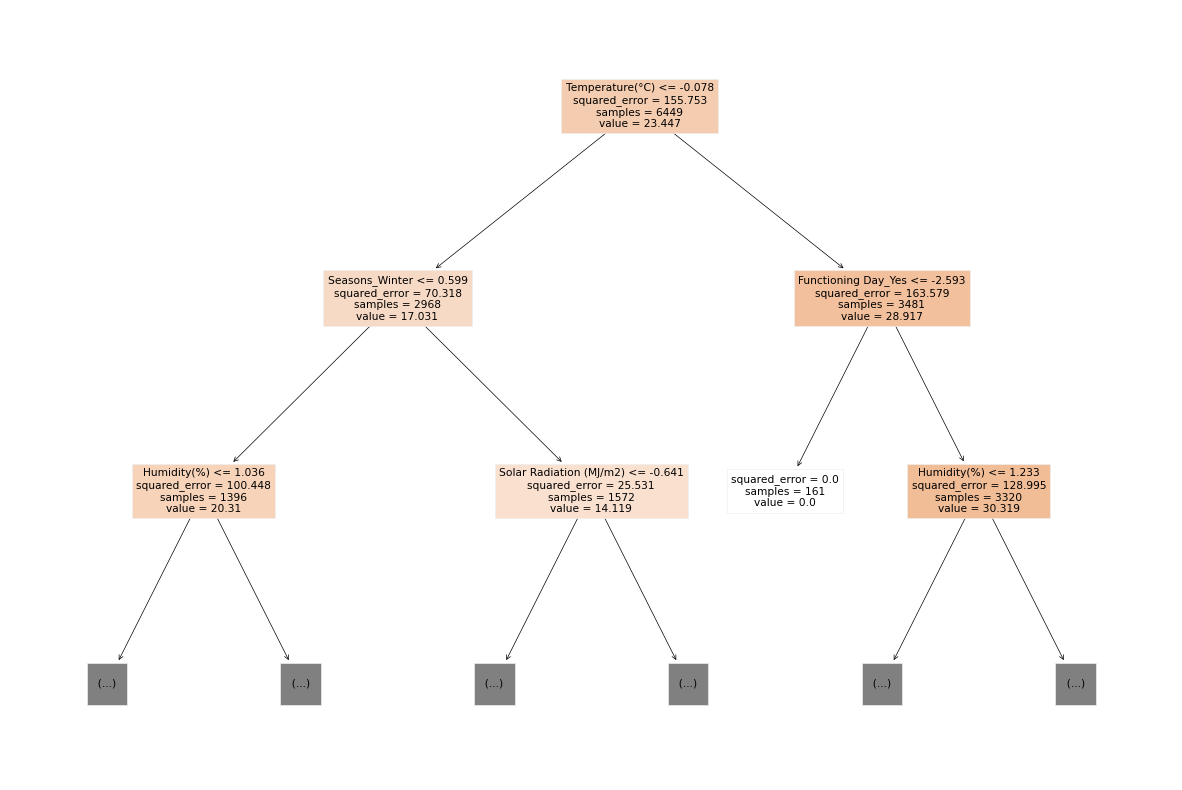

In [ ]:
# visualize D_tree upto depth=2
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_reg_optimal,feature_names=list(df.drop(['Rented Bike Count','Dew point temperature(°C)'],axis=1).columns),max_depth=2,filled=True)
plt.show()

#### 2. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

From the evaluation metric chart we see that model has performed better than the previous models used, there is improvement on r2 score, MAE, RMSE on both test data as well as train data, but there is a difference in performance in train data and test data indicating overfitting

### Random Forest

#### 1. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Model Implementation
rf_reg=RandomForestRegressor()

# setting hyperparameters
param_grid = {'n_estimators':[30,50,70],
              'min_samples_leaf':[3,5],
              'min_samples_split':[18,20,25],
              'max_depth':[30,35,40,45]}

# instantiating a GridSearchcv object for the model
rf_reg_grid=GridSearchCV(estimator=rf_reg,param_grid=param_grid,cv=4,scoring='neg_mean_squared_error',verbose=2)

# fitting the model across various grids
rf_reg_grid.fit(X_train,y_train)

# finding the optimal model
rf_reg_optimal=rf_reg_grid.best_estimator_

# displaying the best parameters for the model
print("The best parameters are:",rf_reg_grid.best_params_)

# predicting train and test data
y_rf_reg_tr=rf_reg_optimal.predict(X_train)
y_rf_reg_tst=rf_reg_optimal.predict(X_test)


Fitting 4 folds for each of 72 candidates, totalling 288 fits
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=18, n_estimators=30; total time=   1.6s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=18, n_estimators=30; total time=   1.4s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=18, n_estimators=30; total time=   1.2s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=18, n_estimators=30; total time=   1.6s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=18, n_estimators=50; total time=   3.8s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=18, n_estimators=50; total time=   2.1s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=18, n_estimators=50; total time=   1.2s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=18, n_estimators=50; total time=   2.0s
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=18, n_estimators=70; total time=   1.8s
[CV] END max_depth=30, min_sa

##### Which hyperparameter optimization technique have you used and why?

We have set some values for n_estimators, min_sample_leaf, min_samples_split, max_depth as hyperparameters tuning.  

We have passes these hypeparmeters in GridSearchcv with cv=4 and scoring is set to neg_mean_squared_error

#### 2. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# calculating different performance metric

# MSE
MSE_tr=mean_squared_error(y_train**2,y_rf_reg_tr**2)
print("MSE of train data is:",MSE_tr)
MSE_tst=mean_squared_error(y_test**2,y_rf_reg_tst**2)
print("MSE of test data is:",MSE_tst)

# MAE
MAE_tr=mean_absolute_error(y_train**2,y_rf_reg_tr**2)
print("MAE of train data is:",MAE_tr)
MAE_tst=mean_absolute_error(y_test**2,y_rf_reg_tst**2)
print("MAE of test data is:",MAE_tst)

# RMSE
rmse_tr=np.sqrt(MSE_tr)
print("RMSE of train data is:",rmse_tr)
rmse_tst=np.sqrt(MSE_tst)
print("RMSE of test data is:",rmse_tst)

# r2 score
r2_tr=r2_score(y_train**2,y_rf_reg_tr**2)
print("r2 score for train is:",r2_tr)
r2_tst=r2_score(y_test**2,y_rf_reg_tst**2)
print("r2 score for test is:",r2_tst)
# adjusted r2 score
adjr2_tr = (1-(1-r2_score(y_train**2, y_rf_reg_tr**2))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("The adjusted r2 score for train data is:",adjr2_tr)
adjr2_tst=(1-(1-r2_score(y_test**2, y_rf_reg_tst**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("The adjusted r2 score for test data is:",adjr2_tst)

MSE of train data is: 24248.106179838196
MSE of test data is: 35923.81123586961
MAE of train data is: 93.61806904976348
MAE of test data is: 119.02841942182778
RMSE of train data is: 155.7180342151743
RMSE of test data is: 189.5357782474581
r2 score for train is: 0.942167935972417
r2 score for test is: 0.9141224297046336
The adjusted r2 score for train data is: 0.9417341954922102
The adjusted r2 score for test data is: 0.9121604480891279


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There has been an significant improvemment in performance metric as compared to other models, the MAE score, RMSE score have improved a lot, r2 score and adjusted r2 score for both train data and test data have improved a lot, there is no significant difference between train scores and test scores, which suggest that model is not overfitting

In [ ]:
df.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning Day_Yes',
       'day_of_week_Weekend', 'month_of_day_August', 'month_of_day_December',
       'month_of_day_February', 'month_of_day_January', 'month_of_day_July',
       'month_of_day_June', 'month_of_day_March', 'month_of_day_May',
       'month_of_day_November', 'month_of_day_October',
       'month_of_day_September', 'Year_2018'],
      dtype='object')

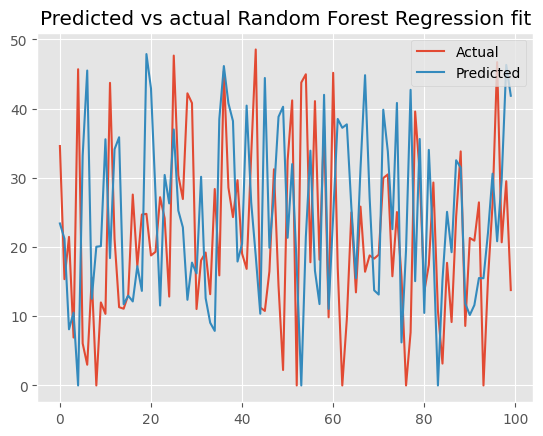

In [ ]:
plt.plot(np.array(y_train)[:100],label="Actual")
plt.plot(y_rf_reg_tst[:100],label="Predicted")
plt.legend()
plt.title("Predicted vs actual Random Forest Regression fit")
plt.show()

In [ ]:
# performance report of all the models in a chart

model_names=['Linear Regression','Ridge Regression','Lasso Regression','Polynomial Regression','Decision Tree','Random Forest']
optimal_models=[l_reg,ridge_optimal,lasso_optimal,poly_reg,dt_reg_optimal,rf_reg_optimal]
def model_metric(model_names,optimal_models,X_train,X_test,y_train,y_test):
  model_df=pd.DataFrame()
  i=0
  for model in optimal_models:
    if model == poly_reg:
      y_poly_tr=poly_reg.predict(X_poly_tr)
      y_poly_tst=poly_reg.predict(X_poly_tst)
      model_df.loc[i,'model']=model_names[i]
      model_df.loc[i,'MSE train']=mean_squared_error(y_train,y_poly_tr)
      model_df.loc[i,'MSE test']=mean_squared_error(y_test,y_poly_tst)
      model_df.loc[i,'MAE train']=mean_absolute_error(y_train,y_poly_tr)
      model_df.loc[i,'MAE test']=mean_absolute_error(y_test,y_poly_tst)
      model_df.loc[i,'RMSE train']=np.sqrt(mean_squared_error(y_train,y_poly_tr))
      model_df.loc[i,'RMSE test']=np.sqrt(mean_squared_error(y_test,y_poly_tst))
      model_df.loc[i,'r2 train']=r2_score(y_train,y_poly_tr)
      model_df.loc[i,'r2 test']=r2_score(y_test,y_poly_tst)
      model_df.loc[i,'adjusted r2 train']=(1-(1-r2_score(y_train, y_poly_tr**2))*((X_poly_tr.shape[0]-1)/(X_poly_tr.shape[0]-X_poly_tr.shape[1]-1)))
      model_df.loc[i,'adjusted r2 test']=(1-(1-r2_score(y_test, y_poly_tst**2))*((X_poly_tst.shape[0]-1)/(X_poly_tst.shape[0]-X_poly_tst.shape[1]-1)))


    else:
      model.fit(X_train,y_train)
      y_pred_tr=model.predict(X_train)
      y_pred_tst=model.predict(X_test)
      model_df.loc[i,'model']=model_names[i]
      model_df.loc[i,'MSE train']=mean_squared_error(y_train,y_pred_tr)
      model_df.loc[i,'MSE test']=mean_squared_error(y_test,y_pred_tst)
      model_df.loc[i,'MAE train']=mean_absolute_error(y_train,y_pred_tr)
      model_df.loc[i,'MAE test']=mean_absolute_error(y_test,y_pred_tst)
      model_df.loc[i,'RMSE train']=np.sqrt(mean_squared_error(y_train,y_pred_tr))
      model_df.loc[i,'RMSE test']=np.sqrt(mean_squared_error(y_test,y_pred_tst))
      model_df.loc[i,'r2 train']=r2_score(y_train,y_pred_tr)
      model_df.loc[i,'r2 test']=r2_score(y_test,y_pred_tst)
      model_df.loc[i,'adjusted r2 train'] = (1-(1-r2_score(y_train, y_pred_tr))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
      model_df.loc[i,'adjusted r2 test'] = (1-(1-r2_score(y_test, y_pred_tst))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
    i+=1
  return model_df







### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We want to consider **adjusted r2** score for positive buisness impact, as the
adjusted r2 score explains the how much of the change in the bike count could be explained by our input features.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We choose **Random Forest as our best model**, it has the best performance metrics among the all the models used, **it has an adjusted r2 score for 91% for test data** which is sigificantly better than other models.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

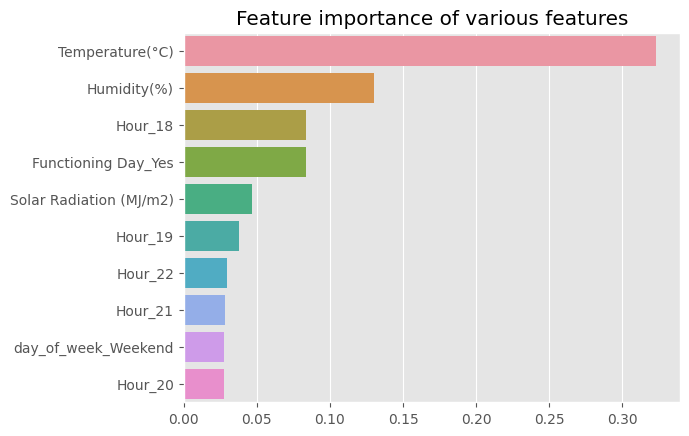

In [ ]:
# feature importance of random forest

# getting feature importance
feature_imp=rf_reg_optimal.feature_importances_

# descending order indices of feature importances
feature_imp_indices=np.argsort(feature_imp)[::-1]
feature_imp=feature_imp[feature_imp_indices]

feature_labels=df.drop(['Dew point temperature(°C)','Rented Bike Count'],axis=1).columns
feature_labels=feature_labels[feature_imp_indices]


# plotting feature importances
sns.barplot(x=feature_imp[:10],y=feature_labels[:10])
plt.title("Feature importance of various features")
plt.show()


From the feature importance which we got using Random Forest model, we see that Temperature has a strong influence in determining the bike count, followed by Humidity and so on.

# **Conclusion**

In [ ]:
# summary of model's performance

model_metric(model_names,optimal_models,X_train,X_test,y_train**2,y_test**2)

model      MSE train       MSE test   MAE train  \
0      Linear Regression  125945.187971  121353.992619  270.807984   
1       Ridge Regression  125947.942790  121357.779137  270.783444   
2       Lasso Regression  125945.187575  121355.277175  270.804310   
3  Polynomial Regression  870290.423406  882261.562085  682.135696   
4          Decision Tree   24595.330319   58666.739702   89.814208   
5          Random Forest   26017.163991   35418.445529   97.500831   

     MAE test  RMSE train   RMSE test  r2 train   r2 test  adjusted r2 train  \
0  264.771798  354.887571  348.359000  0.699619  0.709898           0.697366   
1  264.764409  354.891452  348.364434  0.699612  0.709888           0.697360   
2  264.769721  354.887570  348.360843  0.699619  0.709894           0.697366   
3  691.684957  932.893576  939.287795 -1.075655 -1.109088           0.907259   
4  147.481492  156.828984  242.212179  0.941340  0.859754           0.940900   
5  121.138311  161.298369  188.197889  0.937949  0.915331           0.937483   

   adjusted r2 test  
0          0.703270  
1          0.703261  
2          0.703267  
3          0.818831  
4          0.856550  
5          0.913396

First we did basic data exploration and we found that:  
1. Bike renting count is high in summer and low in winter  
2. Bike renting count is high around 8:00 AM and 6:30 PM, which are around commute hours  
3. BIke count is high in weekdays and low in weekends  
4. Bike renting count is high on month of may, june and july

After data exploration we did hypothesis testing on three hypothetical statements:  
1. Average rented Bike count is greater than 300  
2. Average temperature seoul city is less than 20  
3. Average humidity on seoul city is 58%  


After hypothesis testing we did data preprocessing and sent this processed data to our ML models for prediction, we used various ML models like Linear regression, Ridge regression, Lasso regression, Polynomial regression, Decision trees and Random Forest, we did hyperparameter tuning and cross validation using gridsearchcv to increase model's performance. We developed various performance metric to judge model's performance.   

**We have summarized the model's performance for various models using different performance metric in a table as shown above**, **we find that Random forest is the best model**, and the best performance metric is **adjusted r2 score** as it the best metric to explain the variability in the data. We also calculated feature importance using Random Forest model and we that **Temperature is the most important feature** in determing the prediction of bike count.

